In [ ]:
import zipfile
import os
import gdown

try:
    import gdown
except ImportError:
    !pip install gdown
    import gdown

drive_url = "https://drive.google.com/file/d/1I_908z8XaZzNP3-MvpVQtiu2Qw_r3GO5/view?usp=sharing"
file_id = drive_url.split('/d/')[1].split('/')[0]

zip_file_path = "CV_PROJECT_1.zip"

# Download file from Google Drive
download_url = f"https://drive.google.com/uc?id={file_id}"
print(f"Downloading from Google Drive...")
gdown.download(download_url, zip_file_path, quiet=False)

# Unzip directly to current directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(".")  # Extract to current directory

print(f"Downloaded and extracted to current directory")

# Remove the zip file to save space
os.remove(zip_file_path)
print(f"Cleaned up zip file")

📥 Downloading from Google Drive...


Downloading...
From (original): https://drive.google.com/uc?id=1I_908z8XaZzNP3-MvpVQtiu2Qw_r3GO5
From (redirected): https://drive.google.com/uc?id=1I_908z8XaZzNP3-MvpVQtiu2Qw_r3GO5&confirm=t&uuid=bac84c9c-14f8-4054-a024-9e821eb8c90c
To: /content/CV_PROJECT_1.zip
100%|██████████| 1.24G/1.24G [00:12<00:00, 99.2MB/s]


✅ Downloaded and extracted to current directory
🗑️ Cleaned up zip file


In [ ]:
# !pip install --upgrade google-cloud-storage tqdm opencv-python-headless pandas pillow scikit-learn


In [ ]:
# pip install tensorflow

In [ ]:
# !gcloud config set project ml-projects-460616


Updated property [core/project].


In [ ]:
import os
from google.cloud import storage
import zipfile

FILES={
    'train.zip': 'train.zip',
    'val.zip':'val.zip',
    'test.zip':'test.zip'
}

BUCKET_NAME ='yelp-dataset-photos'

DEST_DIR = "data"

os.makedirs(DEST_DIR, exist_ok=True)

client=storage.Client()
bucket=client.bucket(BUCKET_NAME)


def download_and_extract(zip_name):
    blob=bucket.blob(FILES[zip_name])
    local_path=os.path.join(DEST_DIR,zip_name)

    print(f"Downloading {zip_name}")

    blob.download_to_filename(local_path)

    print(f"Extracting {zip_name}")

    with zipfile.ZipFile(local_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.join(DEST_DIR, zip_name.replace(".zip", "")))

    print(f"Done: {zip_name}\n")

for i in FILES:
    download_and_extract(i)

print("All files downloaded and extracted")



Extracting train.zip
Done: train.zip

Extracting val.zip
Done: val.zip

Extracting test.zip
Done: test.zip

All files downloaded and extracted


In [3]:
# For Google Collab

import os
import shutil

# CSV files are inside CV_PROJECT_1 folder
csv_files = {
    "train_augmented_metadata.csv": "train_augmented_metadata.csv",
    "val_metadata.csv": "val_metadata.csv",
    "test_metadata.csv": "test_metadata.csv"
}

local_dir = "./metadata"
os.makedirs(local_dir, exist_ok=True)

# Copy CSV files from CV_PROJECT_1 folder to metadata folder
for source_name, target_name in csv_files.items():
    source_path = f"./CV_PROJECT_1/{source_name}"
    target_path = os.path.join(local_dir, target_name)

    if os.path.exists(source_path):
        shutil.copy2(source_path, target_path)
        print(f"Copied {source_name} to {target_path}")
    else:
        print(f"File {source_name} not found at {source_path}")

print("All CSV files organized in metadata folder!")

Copied train_augmented_metadata.csv to ./metadata/train_augmented_metadata.csv
Copied val_metadata.csv to ./metadata/val_metadata.csv
Copied test_metadata.csv to ./metadata/test_metadata.csv
All CSV files organized in metadata folder!


In [ ]:
from google.cloud import storage
import os

bucket_name = "yelp-dataset-photos"
csv_files = {
    "train_augmented_metadata.csv": "train_augmented_metadata.csv",
    "val_metadata.csv": "val_metadata.csv",
    "test_metadata.csv": "test_metadata.csv"
}

local_dir = "./metadata"
os.makedirs(local_dir, exist_ok=True)

client = storage.Client()
bucket = client.bucket(bucket_name)

for remote_name, local_name in csv_files.items():
    blob = bucket.blob(remote_name)
    local_path = os.path.join(local_dir, local_name)
    blob.download_to_filename(local_path)
    print(f"Downloaded {remote_name} to {local_path}")


Downloaded train_augmented_metadata.csv to ./metadata/train_augmented_metadata.csv
Downloaded val_metadata.csv to ./metadata/val_metadata.csv
Downloaded test_metadata.csv to ./metadata/test_metadata.csv


In [4]:
# For Google COllab
# organizing labels
import os
import pandas as pd
from shutil import copy2

def organize_images(csv_path, image_dir, output_dir):
    df = pd.read_csv(csv_path)
    copied_count = 0
    missing_count = 0
    total_count = len(df)

    for _, row in df.iterrows():
        photo_id = str(row['photo_id'])
        label = row['label']
        src_path = os.path.join(image_dir, f"{photo_id}.jpg")
        dst_folder = os.path.join(output_dir, label)
        dst_path = os.path.join(dst_folder, f"{photo_id}.jpg")

        os.makedirs(dst_folder, exist_ok=True)

        if os.path.exists(src_path):
            copy2(src_path, dst_path)
            copied_count += 1
        else:
            missing_count += 1

    # Summary report
    print(f" {os.path.basename(csv_path)} Summary:")
    print(f"    Copied: {copied_count}/{total_count} images")
    print(f"    Missing: {missing_count}/{total_count} images")
    print(f"    Success Rate: {(copied_count/total_count)*100:.1f}%")
    print("-" * 50)

    return copied_count

# Different paths for different splits
meta_paths = {
    'train': {
        'csv': 'metadata/train_augmented_metadata.csv',
        'image_dir': './CV_PROJECT_1/augmented_photos/train'  # Train images are in augmented_photos
    },
    'val': {
        'csv': 'metadata/val_metadata.csv',
        'image_dir': './CV_PROJECT_1/split_photos/val'  # Val images are in split_photos
    },
    'test': {
        'csv': 'metadata/test_metadata.csv',
        'image_dir': './CV_PROJECT_1/split_photos/test'  # Test images are in split_photos
    }
}

total_copied = 0
total_expected = 0

for split, config in meta_paths.items():
    print(f" Processing {split} set...")
    copied = organize_images(
        csv_path=config['csv'],
        image_dir=config['image_dir'],
        output_dir=os.path.join("data_sorted", split)
    )
    total_copied += copied

    # Count total expected
    df = pd.read_csv(config['csv'])
    total_expected += len(df)

# Final summary
print(f" FINAL SUMMARY:")
print(f"   Total images copied: {total_copied}")
print(f"   Total images expected: {total_expected}")
print(f"   Overall success rate: {(total_copied/total_expected)*100:.1f}%")

 Processing train set...
 train_augmented_metadata.csv Summary:
    Copied: 17192/17192 images
    Missing: 0/17192 images
    Success Rate: 100.0%
--------------------------------------------------
 Processing val set...
 val_metadata.csv Summary:
    Copied: 2146/2150 images
    Missing: 4/2150 images
    Success Rate: 99.8%
--------------------------------------------------
 Processing test set...
 test_metadata.csv Summary:
    Copied: 2149/2150 images
    Missing: 1/2150 images
    Success Rate: 100.0%
--------------------------------------------------
 FINAL SUMMARY:
   Total images copied: 21487
   Total images expected: 21492
   Overall success rate: 100.0%


In [ ]:
# organizing labels

import os
import pandas as pd
from shutil import copy2

def organize_images(csv_path, image_dir, output_dir):
    df = pd.read_csv(csv_path)

    for _, row in df.iterrows():
        photo_id = str(row['photo_id'])
        label = row['label']

        src_path = os.path.join(image_dir, f"{photo_id}.jpg")
        dst_folder = os.path.join(output_dir, label)
        dst_path = os.path.join(dst_folder, f"{photo_id}.jpg")

        os.makedirs(dst_folder, exist_ok=True)

        if os.path.exists(src_path):
            copy2(src_path, dst_path)


image_root = "data"
meta_paths = {
    'train': 'metadata/train_augmented_metadata.csv',
    'val': 'metadata/val_metadata.csv',
    'test': 'metadata/test_metadata.csv'
}

for split, csv_file in meta_paths.items():
    print(f"Processing {split} set")
    organize_images(
        csv_path=csv_file,
        image_dir=os.path.join(image_root, split, split),
        output_dir=os.path.join("data_sorted", split)
    )

Processing train set
Processing val set
Processing test set


In [ ]:
for root, dirs, files in os.walk("data_sorted/train"):
    print(f"{root} - {len(files)} files")


data_sorted/train - 0 files
data_sorted/train/menu - 1191 files
data_sorted/train/food - 4006 files
data_sorted/train/inside - 4023 files
data_sorted/train/drink - 3971 files
data_sorted/train/outside - 4001 files


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Normalizing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

# 2. Loading images
train_gen = train_datagen.flow_from_directory(
    "data_sorted/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    "data_sorted/val",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 17192 images belonging to 5 classes.
Found 2146 images belonging to 5 classes.


# CNN Model 1

In [6]:
# CNN Model 1

from tensorflow.keras import layers, models, Input

model = models.Sequential()


In [7]:
# First layer
model.add(Input(shape=(128, 128, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [8]:
# second layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [9]:
# Flatten the feature maps to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Final output layer
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
CNN_history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    verbose=1

)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


538/538 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.4887 - loss: 1.2781 - val_accuracy: 0.6678 - val_loss: 0.8857
Epoch 2/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6957 - loss: 0.7942 - val_accuracy: 0.7153 - val_loss: 0.8063
Epoch 3/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7985 - loss: 0.5474 - val_accuracy: 0.7074 - val_loss: 0.8427
Epoch 4/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8815 - loss: 0.3332 - val_accuracy: 0.7060 - val_loss: 0.9410
Epoch 5/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9549 - loss: 0.1501 - val_accuracy: 0.6659 - val_loss: 1.4020
Epoch 6/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9775 - loss: 0.0762 - val_accuracy: 0.6696 - val_loss: 1.8179
Epoch 7/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9851 - loss: 0.0478 - val_accuracy: 0.6841 - val_loss: 1.7475
Epoch 8/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9936 - loss: 0.0257 - val_accurac

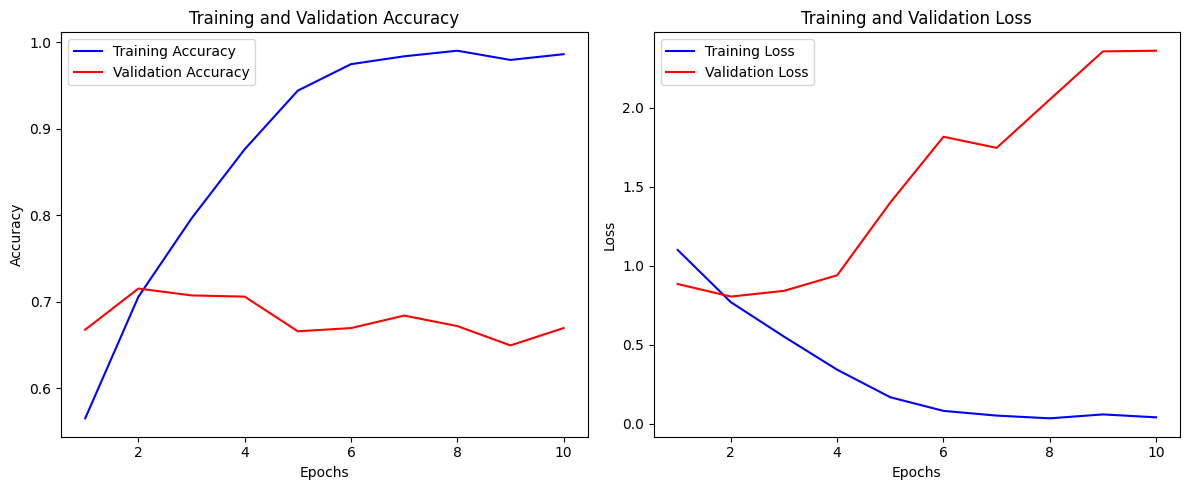

In [12]:
import matplotlib.pyplot as plt


acc     = CNN_history.history['accuracy']
val_acc = CNN_history.history['val_accuracy']
loss     = CNN_history.history['loss']
val_loss = CNN_history.history['val_loss']
epochs   = range(1, len(acc) + 1)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd


train_df = pd.read_csv("metadata/train_augmented_metadata.csv")
val_df = pd.read_csv("metadata/val_metadata.csv")
test_df = pd.read_csv("metadata/test_metadata.csv")


for df in [train_df, val_df, test_df]:
    df['photo_id'] = df['label'] + '/' + df['photo_id'].astype(str) + ".jpg"


eval_datagen = ImageDataGenerator(rescale=1./255)

# evaluation purpose genrators
train_eval_gen = eval_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="data_sorted/train",
    x_col="photo_id",
    y_col="label",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

val_eval_gen = eval_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory="data_sorted/val",
    x_col="photo_id",
    y_col="label",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

test_generator = eval_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="data_sorted/test",
    x_col="photo_id",
    y_col="label",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 17192 validated image filenames belonging to 5 classes.
Found 2146 validated image filenames belonging to 5 classes.
Found 2149 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 4 invalid image filename(s) in x_col="photo_id". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="photo_id". These filename(s) will be ignored.
  warnings.warn(


In [14]:
# Evaluation Function

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

def evaluate_model(model, generator, title="Model Evaluation"):
    print(f"\n Evaluating on {title} set")

    # Prediction
    y_pred_proba = model.predict(generator, verbose=1)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = generator.classes
    class_labels = list(generator.class_indices.keys())

    # Accuracy
    _, acc = model.evaluate(generator, verbose=0)
    print(f"\n{title} Accuracy: {acc * 100:.2f}%")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    # AUC Score (macro)
    try:
        y_true_bin = label_binarize(y_true, classes=np.arange(len(class_labels)))
        auc_macro = roc_auc_score(y_true_bin, y_pred_proba, average='macro', multi_class='ovr')
        aucs = roc_auc_score(y_true_bin, y_pred_proba, average=None, multi_class='ovr')
        print(f"\n AUC Score (macro average): {auc_macro:.4f}")
        for i, label in enumerate(class_labels):
            print(f"   • AUC for class '{label}': {aucs[i]:.4f}")
    except Exception as e:
        print(f"\n AUC calculation failed: {e}")

    # ROC Curve per class
    try:
        fpr = {}
        tpr = {}
        for i in range(len(class_labels)):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])

        plt.figure(figsize=(10, 7))
        for i in range(len(class_labels)):
            roc_auc = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--', lw=1)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curves - {title}")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"\n ROC curve plotting failed: {e}")



 Evaluating on Train set


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


538/538 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step

Train Accuracy: 99.58%

Classification Report:
              precision    recall  f1-score   support

       drink       1.00      0.99      1.00      3971
        food       1.00      1.00      1.00      4006
      inside       1.00      0.99      1.00      4023
        menu       0.99      1.00      1.00      1191
     outside       0.99      1.00      0.99      4001

    accuracy                           1.00     17192
   macro avg       1.00      1.00      1.00     17192
weighted avg       1.00      1.00      1.00     17192



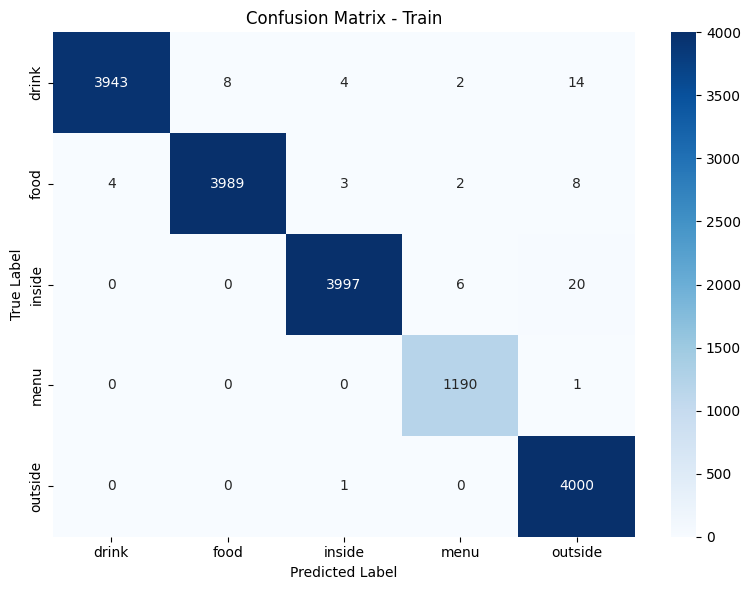


 AUC Score (macro average): 1.0000
   • AUC for class 'drink': 1.0000
   • AUC for class 'food': 1.0000
   • AUC for class 'inside': 0.9999
   • AUC for class 'menu': 1.0000
   • AUC for class 'outside': 1.0000


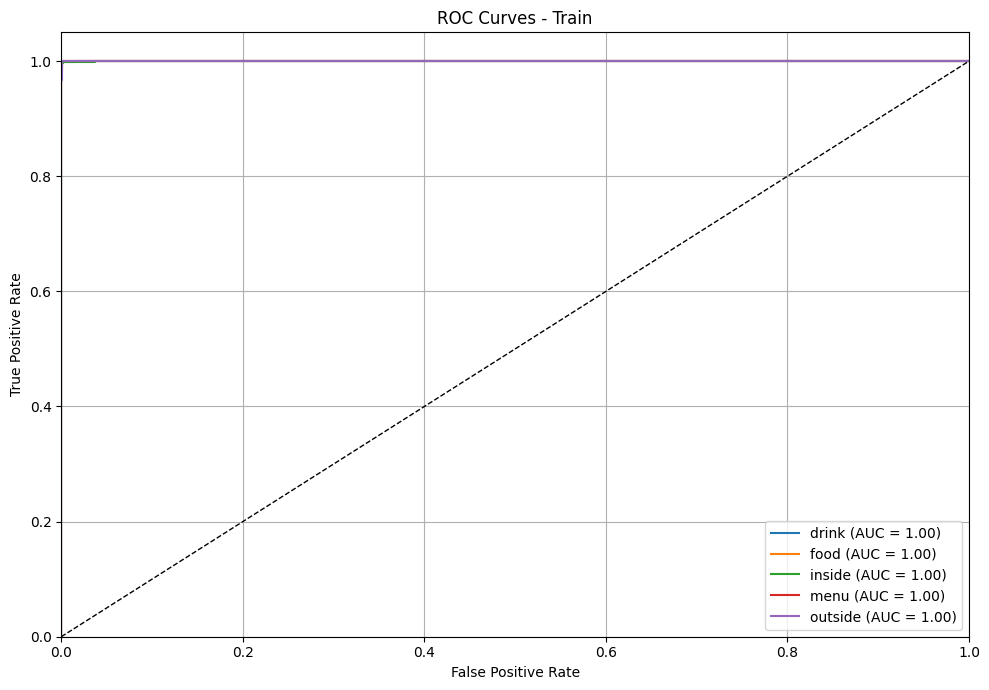

In [15]:
evaluate_model(model, train_eval_gen, "Train")




 Evaluating on Validation set
 4/68 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

Validation Accuracy: 66.96%

Classification Report:
              precision    recall  f1-score   support

       drink       0.73      0.55      0.63       522
        food       0.80      0.76      0.78       486
      inside       0.58      0.62      0.60       481
        menu       0.62      0.62      0.62       157
     outside       0.62      0.76      0.68       500

    accuracy                           0.67      2146
   macro avg       0.67      0.66      0.66      2146
weighted avg       0.68      0.67      0.67      2146



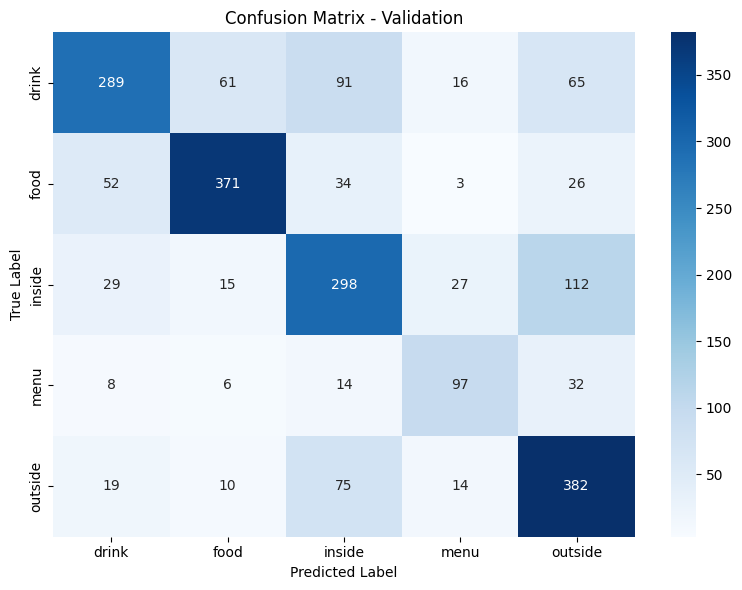


 AUC Score (macro average): 0.8974
   • AUC for class 'drink': 0.8676
   • AUC for class 'food': 0.9416
   • AUC for class 'inside': 0.8560
   • AUC for class 'menu': 0.9243
   • AUC for class 'outside': 0.8976


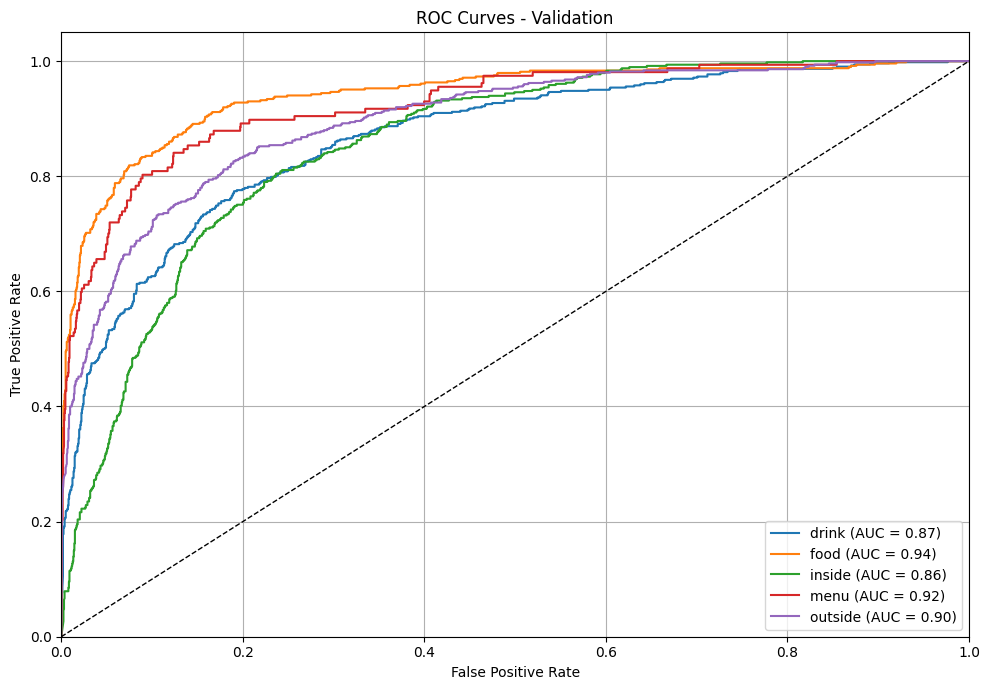

In [16]:
evaluate_model(model, val_eval_gen, "Validation")

Evaluation:

1. Training has 98% accuracy, but validation has only 65%. Model clearly overfits the data.
2. Model eventhough has less accuracy but is able to rank correct classes higher then wrong ones which is told by with macro AUC 89%

Next steps:

1. Add regularization
2. intriduce early stopping
3. Decrease filters

# CNN Model-2

In [17]:
from tensorflow.keras import models, layers, regularizers, callbacks, Input


model = models.Sequential()

# Input Layer
model.add(Input(shape=(128, 128, 3)))

# Convolutionallayer 1
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

#  L2 and Dropout
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [18]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.4017 - loss: 1.4772 - val_accuracy: 0.5890 - val_loss: 1.1319
Epoch 2/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.5267 - loss: 1.2340 - val_accuracy: 0.5867 - val_loss: 1.1232
Epoch 3/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.5806 - loss: 1.1658 - val_accuracy: 0.6850 - val_loss: 1.0030
Epoch 4/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.6294 - loss: 1.0854 - val_accuracy: 0.6836 - val_loss: 1.0001
Epoch 5/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6438 - loss: 1.0649 - val_accuracy: 0.6999 - val_loss: 0.9941
Epoch 6/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6717 - loss: 1.0169 - val_accuracy: 0.6966 - val_loss: 0.9903
Epoch 7/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.6863 - loss: 0.9892 - val_accuracy: 0.7032 - val_loss: 0.9942
Epoch 8/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6918 - loss: 0.9745 - 


 Evaluating on Train set
538/538 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step

Train Accuracy: 82.85%

Classification Report:
              precision    recall  f1-score   support

       drink       0.78      0.81      0.80      3971
        food       0.91      0.87      0.89      4006
      inside       0.76      0.84      0.80      4023
        menu       0.88      0.79      0.83      1191
     outside       0.87      0.80      0.84      4001

    accuracy                           0.83     17192
   macro avg       0.84      0.82      0.83     17192
weighted avg       0.83      0.83      0.83     17192



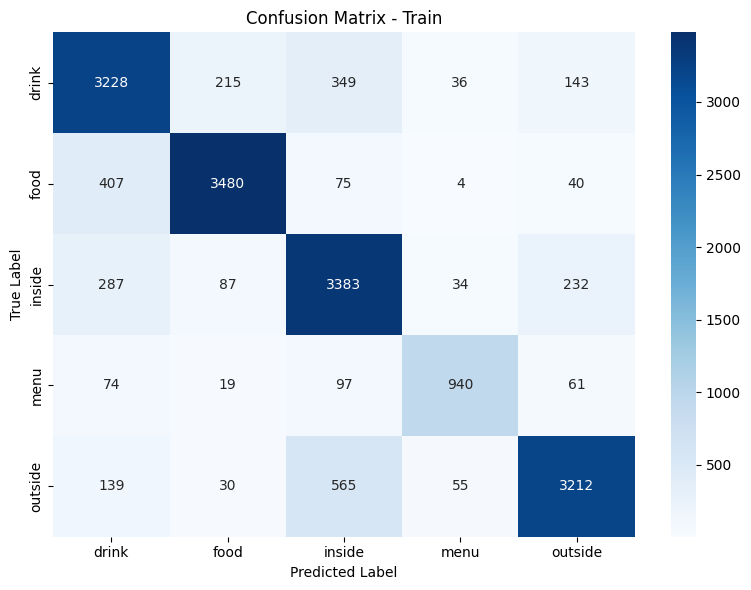


 AUC Score (macro average): 0.9684
   • AUC for class 'drink': 0.9491
   • AUC for class 'food': 0.9854
   • AUC for class 'inside': 0.9556
   • AUC for class 'menu': 0.9826
   • AUC for class 'outside': 0.9692


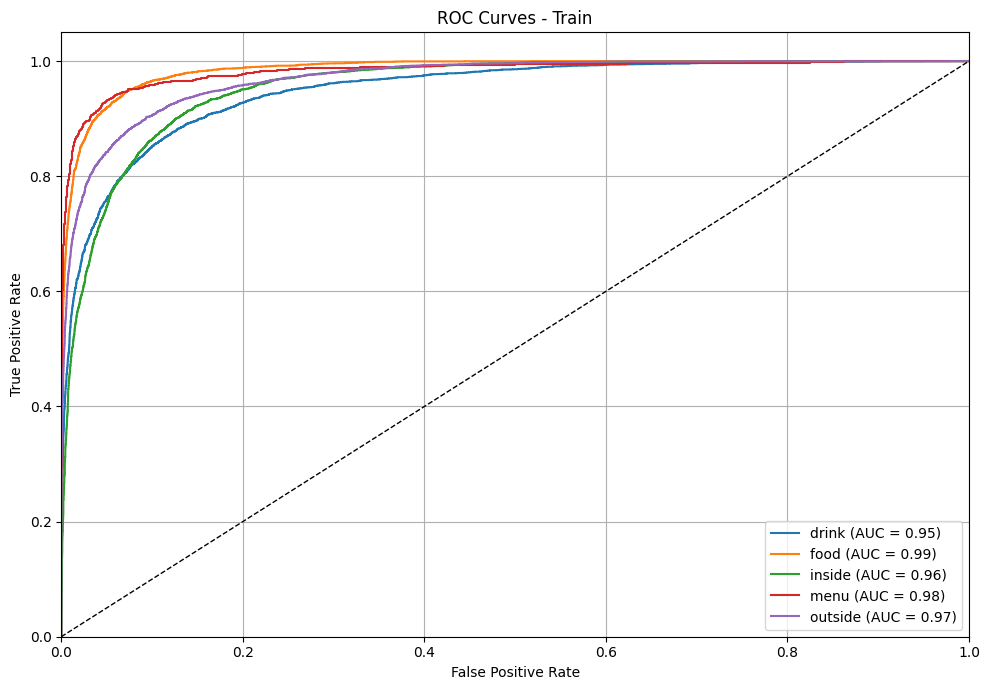

In [19]:
evaluate_model(model, train_eval_gen, "Train")


 Evaluating on val set
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

val Accuracy: 72.88%

Classification Report:
              precision    recall  f1-score   support

       drink       0.76      0.67      0.71       522
        food       0.85      0.78      0.82       486
      inside       0.62      0.76      0.69       481
        menu       0.63      0.68      0.66       157
     outside       0.74      0.72      0.73       500

    accuracy                           0.73      2146
   macro avg       0.72      0.72      0.72      2146
weighted avg       0.74      0.73      0.73      2146



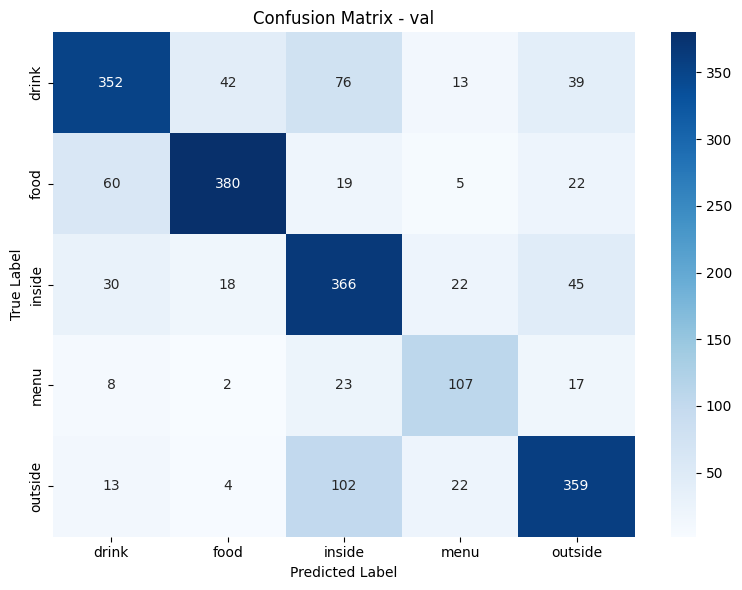


 AUC Score (macro average): 0.9236
   • AUC for class 'drink': 0.8897
   • AUC for class 'food': 0.9537
   • AUC for class 'inside': 0.9035
   • AUC for class 'menu': 0.9461
   • AUC for class 'outside': 0.9251


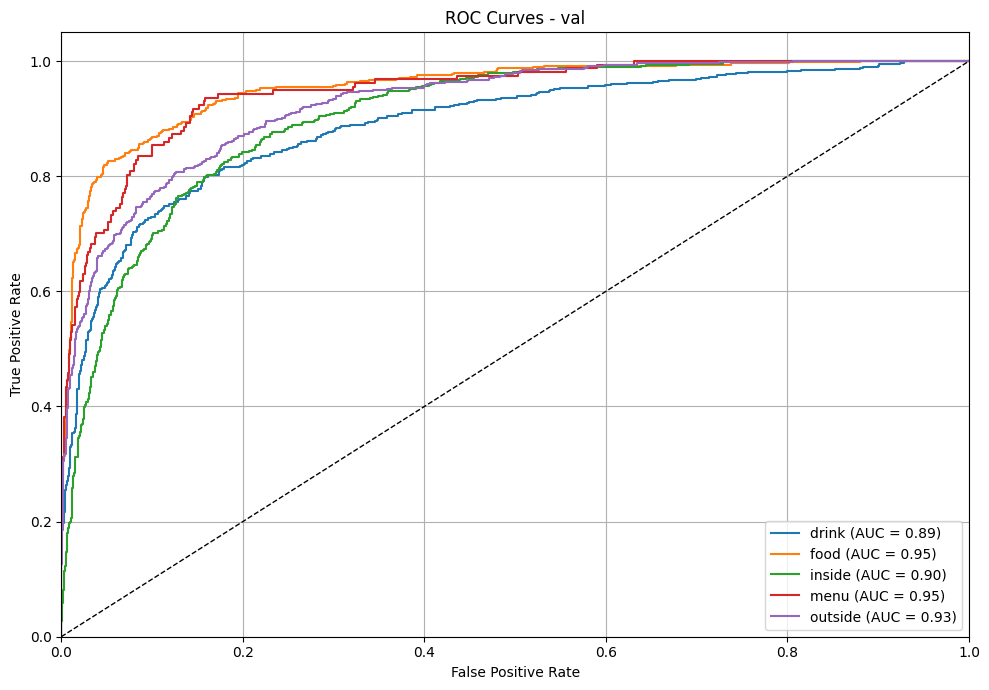

In [20]:
evaluate_model(model, val_eval_gen, "val")

In [21]:
# Tracking evalution Metrics

def log_accuracy_auc(model_name, dataset_name, accuracy, auc_score, save_path=None):

    entry = {

        "model_name": model_name,
        "dataset": dataset_name,
        "accuracy": round(accuracy * 100, 2),
        "auc": round(auc_score, 4)
    }

    df = pd.DataFrame([entry])

    if save_path:
        try:

            existing_df = pd.read_csv(save_path)
            df = pd.concat([existing_df, df], ignore_index=True)
        except FileNotFoundError:
            pass

        df.to_csv(save_path, index=False)
        print(f" Log saved to: {save_path}")

    return df



 Evaluating on val set
 7/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step

val Accuracy: 72.27%

Classification Report:
              precision    recall  f1-score   support

       drink       0.74      0.64      0.69       507
        food       0.86      0.79      0.82       495
      inside       0.64      0.73      0.68       496
        menu       0.62      0.68      0.65       152
     outside       0.72      0.74      0.73       499

    accuracy                           0.72      2149
   macro avg       0.71      0.72      0.71      2149
weighted avg       0.73      0.72      0.72      2149



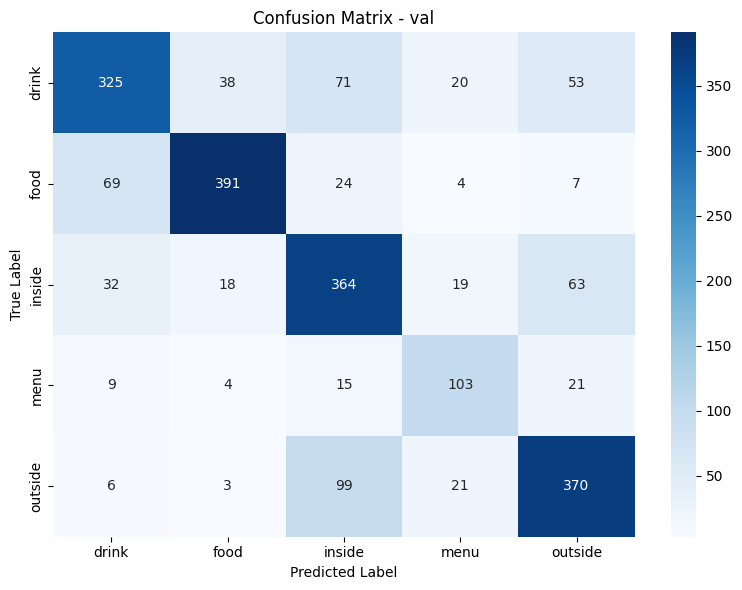


 AUC Score (macro average): 0.9231
   • AUC for class 'drink': 0.8849
   • AUC for class 'food': 0.9656
   • AUC for class 'inside': 0.8942
   • AUC for class 'menu': 0.9388
   • AUC for class 'outside': 0.9318


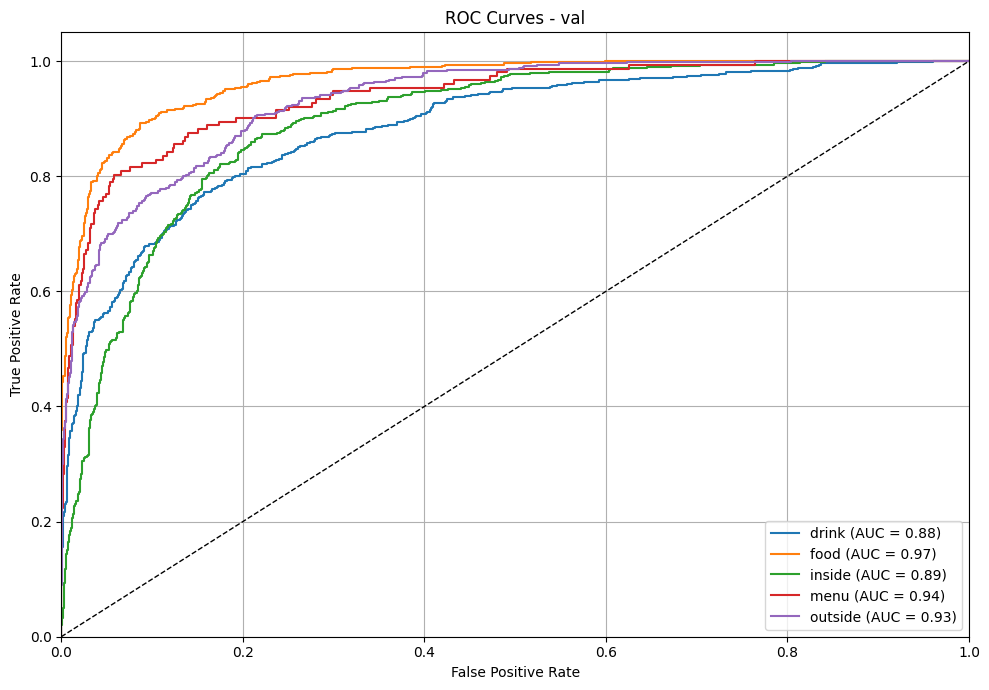

In [22]:
evaluate_model(model, test_generator, "val")

Evaluation summary:

1. Train accuracy is 78% and AUC is 95%.
2. Test accuracy is 71.5% and AUC is 92%.
3. Model is confusing between Inside image and Outside image and Menu being confused with both Inside and Outside.
4. 85% of food images are being identified correctly.

Overall, CNN model 2 is able to identify almost 72% of images correctly with 92% confidence in ranking correct image apart from other images. CNN model is achieving good seperability of classes or images with decent accuracy.


Next Steps:
1. Further model tuning
2. Modifying architecture.
3. Filters and nodes.
4. Hyperparameter training.
5. Training on more images

In [24]:
#model.save("cnn_yelp_model1.keras")


# Model Tuning - 1
# CNN Model-1

Changes:

1. Increasing convulution filter. using 32 for convolution layer 1 and 64 for second layer
2. Increasing number of neurons from 64 to 128
3. regularization and dropout are same.

This is to help model to learn complex patterns without overfitting and to get better accuracy than before.


In [26]:
from tensorflow.keras import models, layers, regularizers, callbacks, Input

model_tuned1 = models.Sequential()
#Input layer
model_tuned1.add(Input(shape=(128, 128, 3)))

# Convolutional Layer 1
model_tuned1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_tuned1.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model_tuned1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_tuned1.add(layers.MaxPooling2D((2, 2)))

# More Neurons
model_tuned1.add(layers.Flatten())
model_tuned1.add(layers.Dense(128, activation='relu',
                              kernel_regularizer=regularizers.l2(0.001)))
model_tuned1.add(layers.Dropout(0.5))

# Output Layer
model_tuned1.add(layers.Dense(train_gen.num_classes, activation='softmax'))


model_tuned1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping setup
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [27]:
# Training the model

tuned1_history = model_tuned1.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.4161 - loss: 1.7723 - val_accuracy: 0.5610 - val_loss: 1.2189
Epoch 2/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.5686 - loss: 1.2278 - val_accuracy: 0.6603 - val_loss: 1.0994
Epoch 3/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.6421 - loss: 1.1298 - val_accuracy: 0.6729 - val_loss: 1.0689
Epoch 4/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.6762 - loss: 1.0768 - val_accuracy: 0.6976 - val_loss: 1.0489
Epoch 5/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7100 - loss: 1.0226 - val_accuracy: 0.6925 - val_loss: 1.0780
Epoch 6/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7274 - loss: 0.9840 - val_accuracy: 0.7265 - val_loss: 1.0388
Epoch 7/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7458 - loss: 0.9698 - val_accuracy: 0.6873 - val_loss: 1.1194
Epoch 8/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7562 - loss: 0.9556 - 


 Evaluating on train set
538/538 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step

train Accuracy: 80.91%

Classification Report:
              precision    recall  f1-score   support

       drink       0.81      0.74      0.77      3971
        food       0.84      0.92      0.87      4006
      inside       0.72      0.83      0.77      4023
        menu       0.94      0.68      0.79      1191
     outside       0.86      0.78      0.82      4001

    accuracy                           0.81     17192
   macro avg       0.83      0.79      0.81     17192
weighted avg       0.81      0.81      0.81     17192



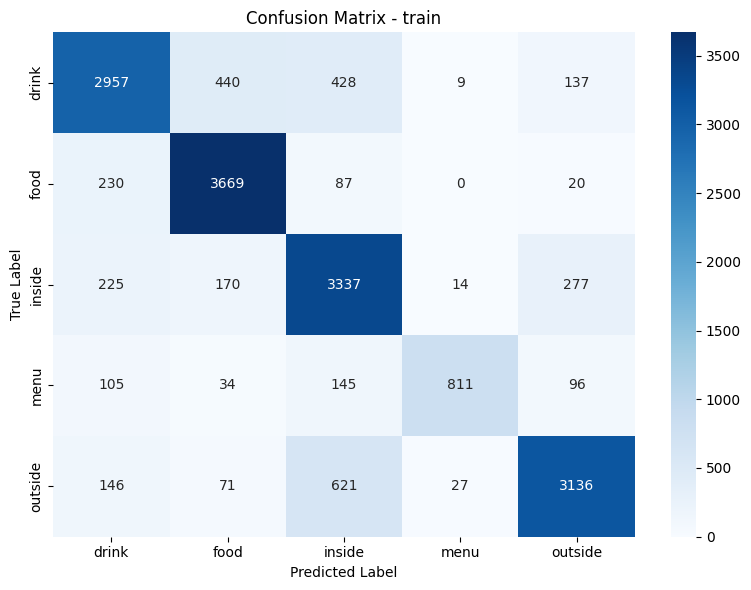


 AUC Score (macro average): 0.9658
   • AUC for class 'drink': 0.9497
   • AUC for class 'food': 0.9829
   • AUC for class 'inside': 0.9501
   • AUC for class 'menu': 0.9835
   • AUC for class 'outside': 0.9627


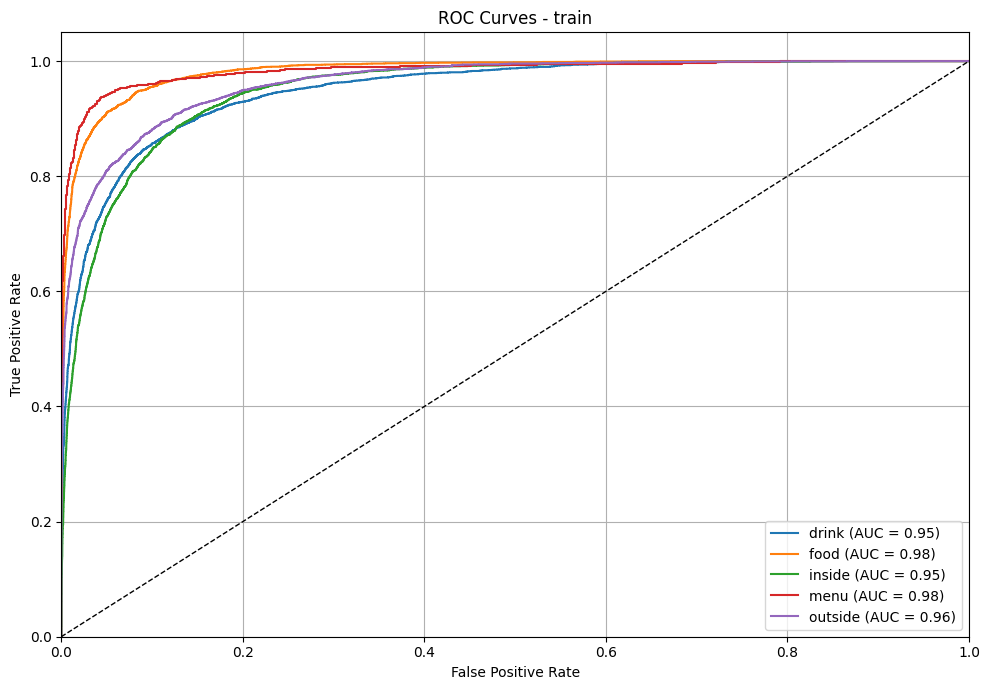


 Evaluating on validation set set
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

validation set Accuracy: 72.65%

Classification Report:
              precision    recall  f1-score   support

       drink       0.79      0.60      0.68       522
        food       0.76      0.87      0.81       486
      inside       0.62      0.77      0.68       481
        menu       0.78      0.59      0.67       157
     outside       0.76      0.72      0.74       500

    accuracy                           0.73      2146
   macro avg       0.74      0.71      0.72      2146
weighted avg       0.74      0.73      0.72      2146



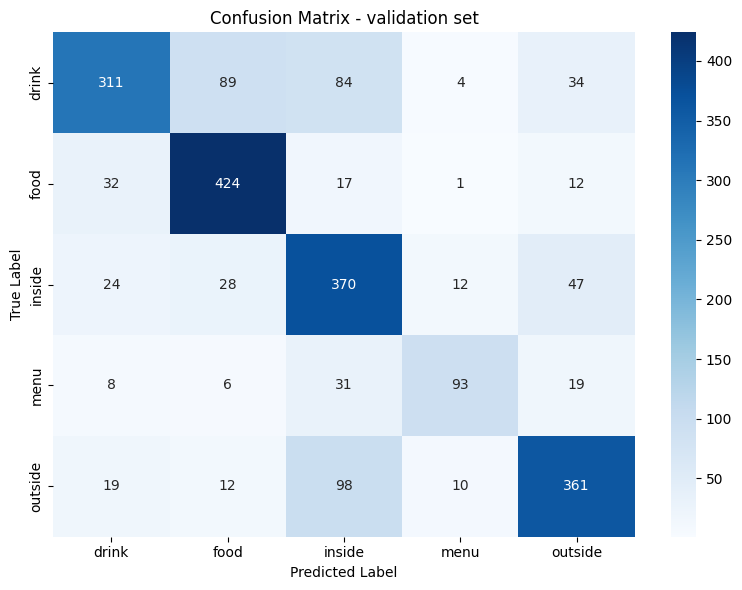


 AUC Score (macro average): 0.9224
   • AUC for class 'drink': 0.8858
   • AUC for class 'food': 0.9542
   • AUC for class 'inside': 0.9005
   • AUC for class 'menu': 0.9477
   • AUC for class 'outside': 0.9239


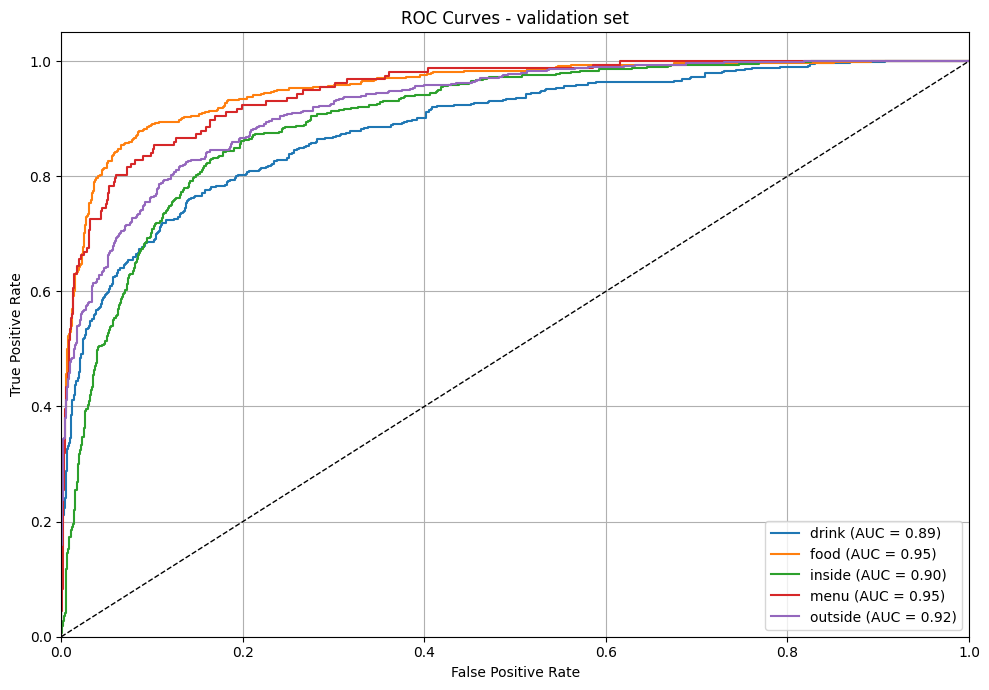

In [28]:
evaluate_model(model_tuned1, train_eval_gen, "train")
evaluate_model(model_tuned1, val_eval_gen, "validation set")


 Evaluating on test set
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step

test Accuracy: 71.61%

Classification Report:
              precision    recall  f1-score   support

       drink       0.77      0.58      0.66       507
        food       0.78      0.86      0.82       495
      inside       0.60      0.72      0.65       496
        menu       0.76      0.53      0.63       152
     outside       0.74      0.76      0.75       499

    accuracy                           0.72      2149
   macro avg       0.73      0.69      0.70      2149
weighted avg       0.72      0.72      0.71      2149



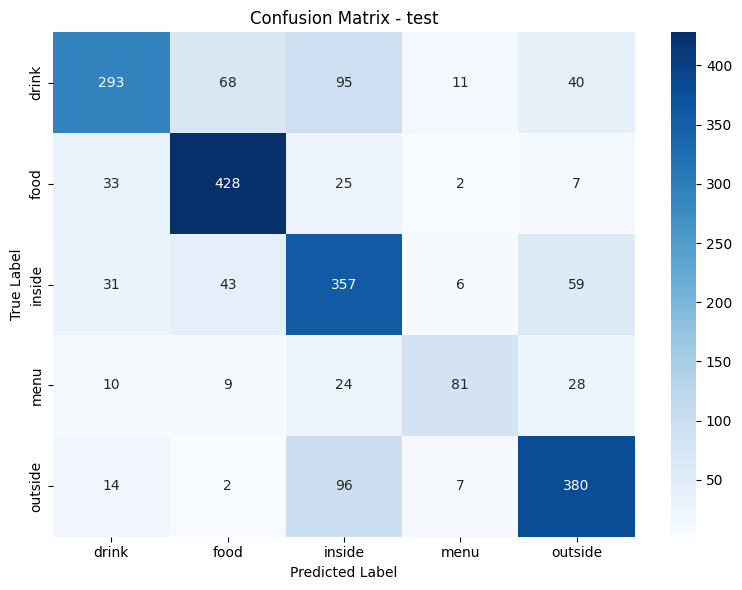


 AUC Score (macro average): 0.9290
   • AUC for class 'drink': 0.9044
   • AUC for class 'food': 0.9683
   • AUC for class 'inside': 0.8900
   • AUC for class 'menu': 0.9428
   • AUC for class 'outside': 0.9394


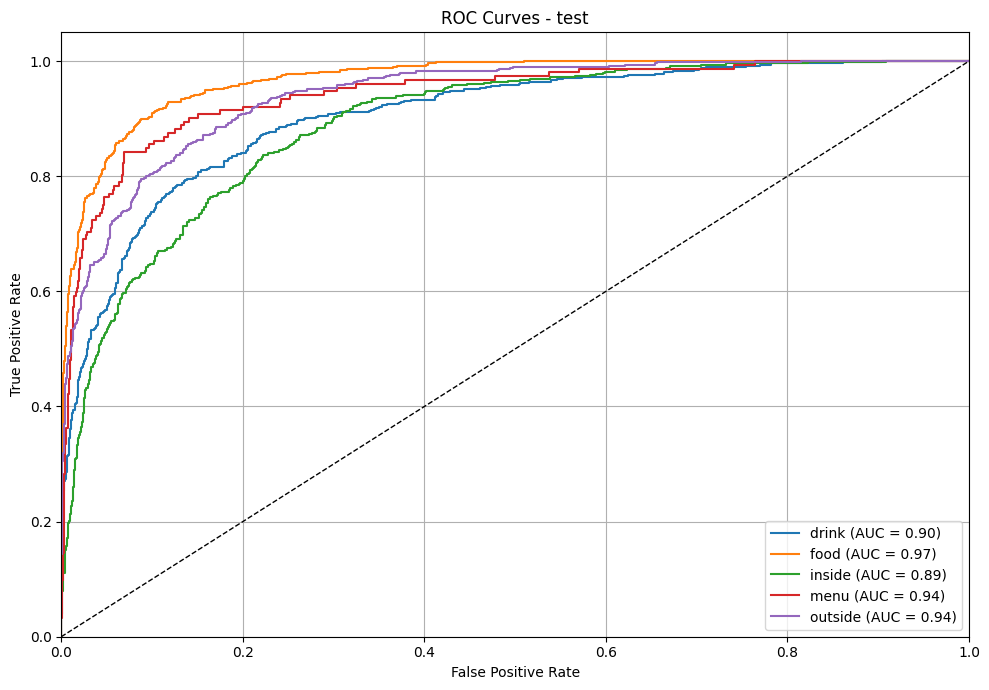

In [29]:
evaluate_model(model_tuned1, test_generator, "test")

Evaluation summary

1. Train accuracy is 79% and validation accuracy is 72%. There is no much improvement from model1.

Next steps:
1. Will try to do Augmentation of training data while training to reduce overfitting by increasing variation among pictures and virtually providing mode data without providing more data.
2. Used three convolution layers from 16, 32,64 and 128 neurons


# Model Tuning 2
# CNN model 2

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_train_gen = augmented_train_datagen.flow_from_directory(
    directory='data_sorted/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


Found 17192 images belonging to 5 classes.


In [32]:
from tensorflow.keras import models, layers, regularizers, callbacks, Input

# Define the model
model_tuned2= models.Sequential()

# Input Layer
model_tuned2.add(Input(shape=(128, 128, 3)))

# Convolutional layer 1
model_tuned2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_tuned2.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model_tuned2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_tuned2.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3
model_tuned2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_tuned2.add(layers.MaxPooling2D((2, 2)))

# Neurons
model_tuned2.add(layers.Flatten())
model_tuned2.add(layers.Dense(128, activation='relu',
                              kernel_regularizer=regularizers.l2(0.001)))
model_tuned2.add(layers.Dropout(0.3))

# Output Layer
model_tuned2.add(layers.Dense(train_gen.num_classes, activation='softmax'))


model_tuned2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping
early_stop2 = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [33]:
#Model Training
CNN_tuned2_history = model_tuned2.fit(
    augmented_train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop2],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 83s 148ms/step - accuracy: 0.4207 - loss: 1.4763 - val_accuracy: 0.5690 - val_loss: 1.1792
Epoch 2/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 75s 140ms/step - accuracy: 0.5673 - loss: 1.1605 - val_accuracy: 0.6603 - val_loss: 1.0300
Epoch 3/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 77s 143ms/step - accuracy: 0.6297 - loss: 1.0566 - val_accuracy: 0.6337 - val_loss: 1.1008
Epoch 4/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 77s 144ms/step - accuracy: 0.6788 - loss: 0.9709 - val_accuracy: 0.6300 - val_loss: 1.0863
Epoch 5/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 76s 141ms/step - accuracy: 0.6895 - loss: 0.9393 - val_accuracy: 0.7088 - val_loss: 0.9225
Epoch 6/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 76s 142ms/step - accuracy: 0.7142 - loss: 0.8928 - val_accuracy: 0.6724 - val_loss: 1.0382
Epoch 7/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 76s 141ms/step - accuracy: 0.7210 - loss: 0.8711 - val_accuracy: 0.7344 - val_loss: 0.8557
Epoch 8/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 76s 141ms/step - accuracy: 0.7263 - loss: 0


 Evaluating on train set
538/538 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step

train Accuracy: 79.54%

Classification Report:
              precision    recall  f1-score   support

       drink       0.88      0.66      0.75      3971
        food       0.85      0.89      0.87      4006
      inside       0.67      0.85      0.75      4023
        menu       0.88      0.78      0.83      1191
     outside       0.81      0.79      0.80      4001

    accuracy                           0.80     17192
   macro avg       0.82      0.79      0.80     17192
weighted avg       0.81      0.80      0.80     17192



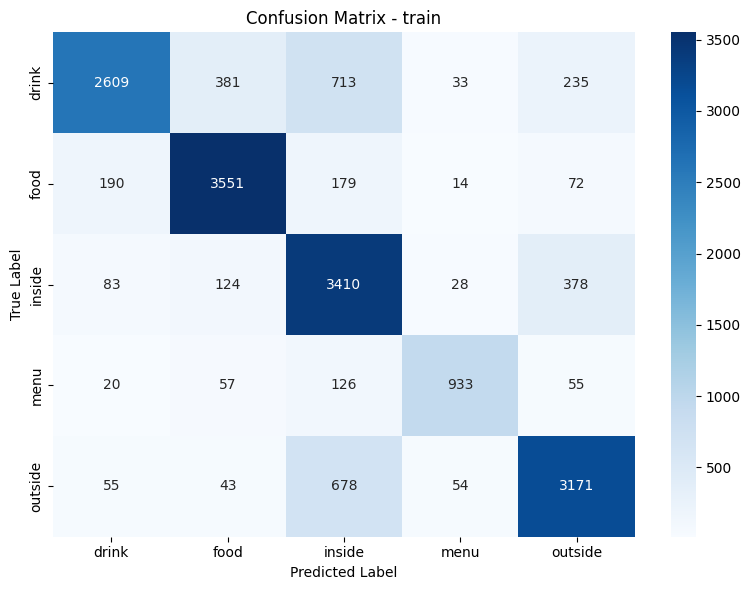


 AUC Score (macro average): 0.9601
   • AUC for class 'drink': 0.9453
   • AUC for class 'food': 0.9783
   • AUC for class 'inside': 0.9362
   • AUC for class 'menu': 0.9832
   • AUC for class 'outside': 0.9573


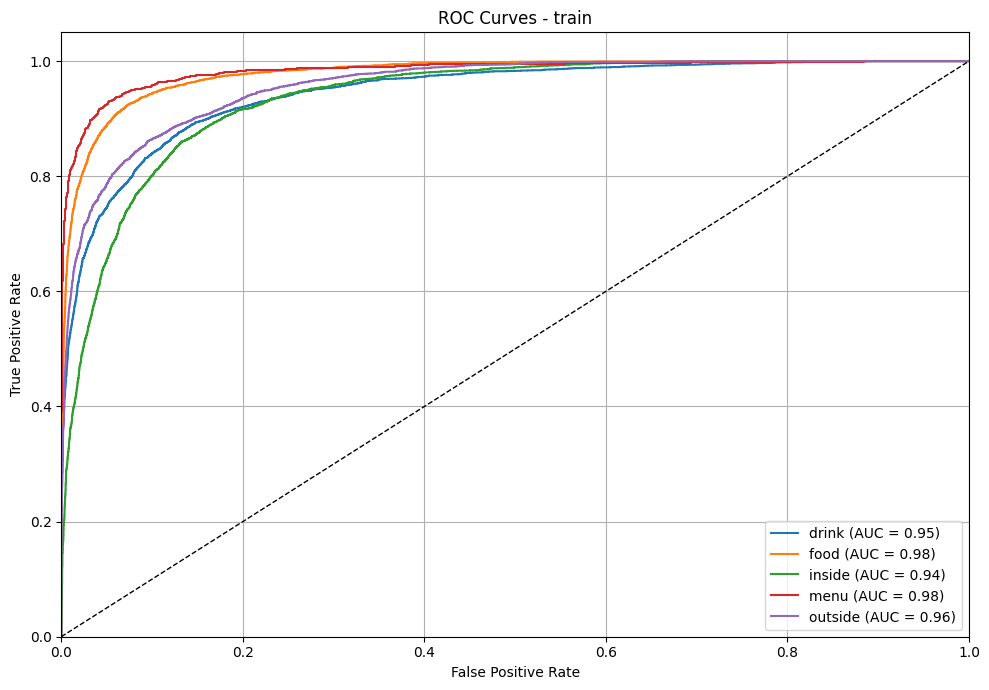

In [34]:
evaluate_model(model_tuned2, train_eval_gen, "train")


 Evaluating on val set
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

val Accuracy: 76.70%

Classification Report:
              precision    recall  f1-score   support

       drink       0.88      0.61      0.72       522
        food       0.86      0.85      0.86       486
      inside       0.62      0.83      0.71       481
        menu       0.77      0.76      0.77       157
     outside       0.77      0.79      0.78       500

    accuracy                           0.77      2146
   macro avg       0.78      0.77      0.77      2146
weighted avg       0.79      0.77      0.77      2146



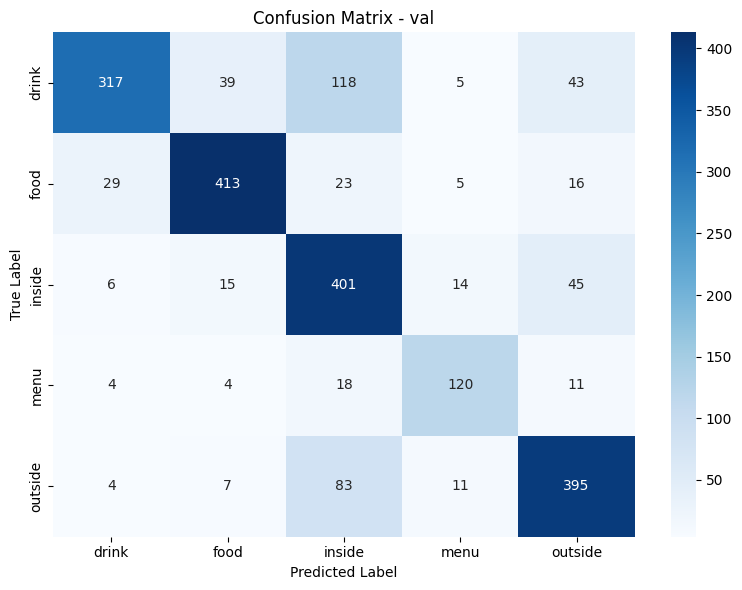


 AUC Score (macro average): 0.9509
   • AUC for class 'drink': 0.9309
   • AUC for class 'food': 0.9729
   • AUC for class 'inside': 0.9293
   • AUC for class 'menu': 0.9698
   • AUC for class 'outside': 0.9515


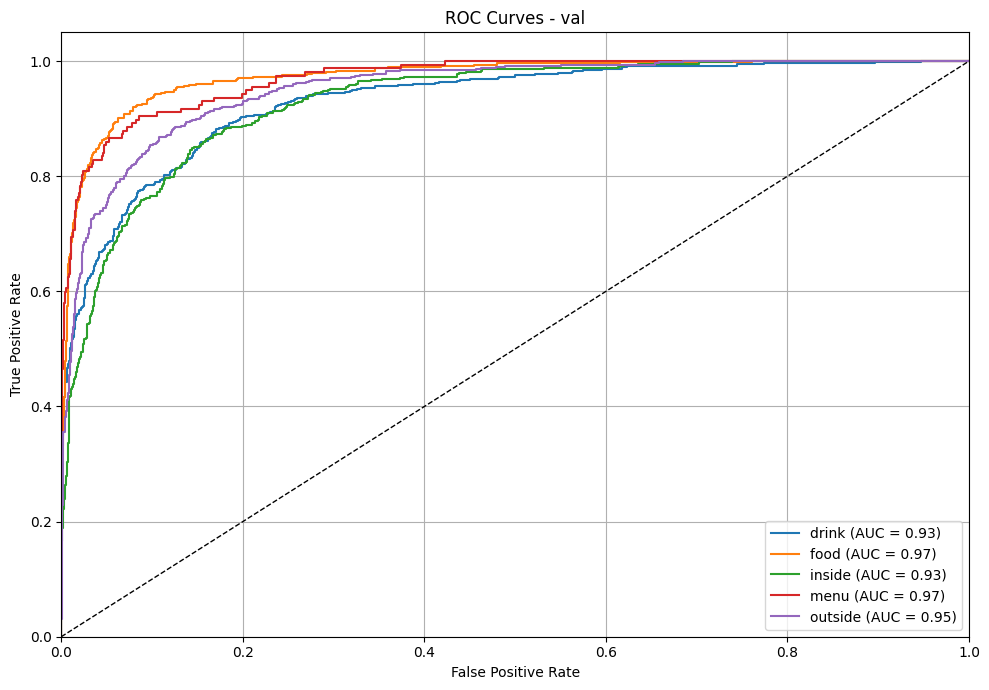

In [35]:
evaluate_model(model_tuned2, val_eval_gen, "val")


 Evaluating on test set
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step

test Accuracy: 77.76%

Classification Report:
              precision    recall  f1-score   support

       drink       0.88      0.63      0.73       507
        food       0.87      0.86      0.86       495
      inside       0.63      0.80      0.71       496
        menu       0.80      0.80      0.80       152
     outside       0.79      0.82      0.80       499

    accuracy                           0.78      2149
   macro avg       0.79      0.78      0.78      2149
weighted avg       0.79      0.78      0.78      2149



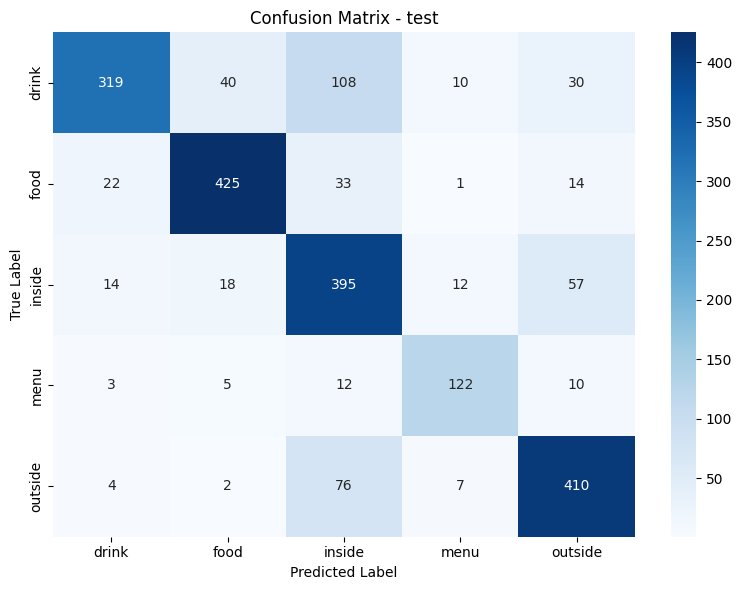


 AUC Score (macro average): 0.9534
   • AUC for class 'drink': 0.9372
   • AUC for class 'food': 0.9763
   • AUC for class 'inside': 0.9202
   • AUC for class 'menu': 0.9724
   • AUC for class 'outside': 0.9607


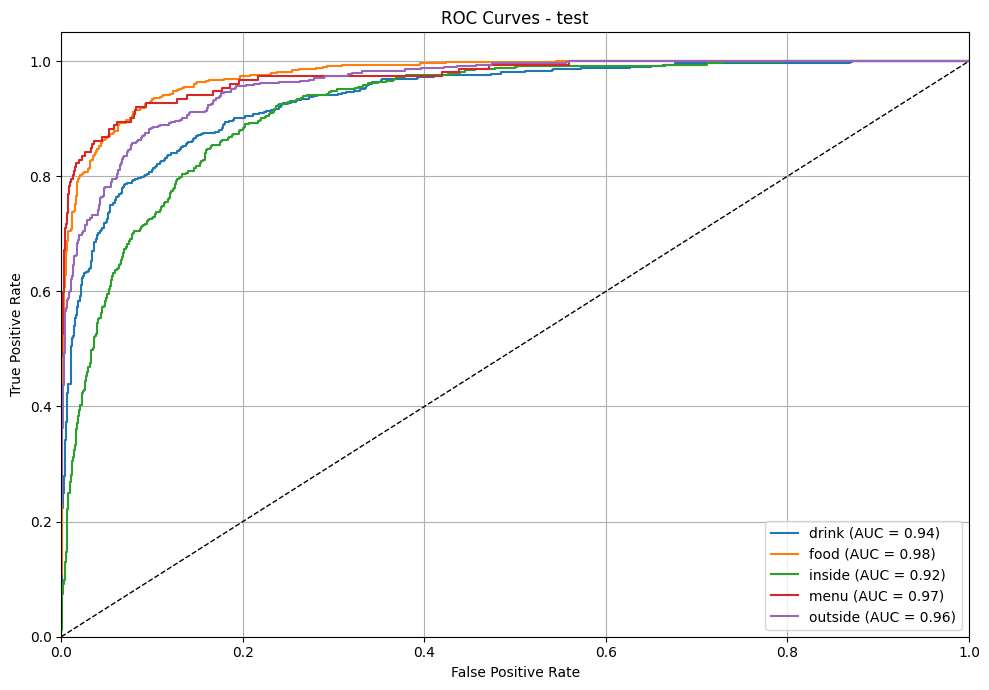

In [36]:
evaluate_model(model_tuned2, test_generator, "test")

In [37]:
# Saving CNN tuned models 1 and 2

model_tuned1.save("CNN_model_tuned1.keras")
model_tuned2.save("CNN_model_tuned2.keras")

# Model tuning 3

# CNN model tuning 3

1. Switched to RMSprop optimizer

2. Added ReduceLRonplateau to dynamically adapt learning rate



In [44]:
from tensorflow.keras import models, layers, regularizers, callbacks, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model_tuned3= models.Sequential()

# Input Layer
model_tuned3.add(Input(shape=(128, 128, 3)))

# Convolutional layer 1
model_tuned3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_tuned3.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model_tuned3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_tuned3.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3
model_tuned3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_tuned3.add(layers.MaxPooling2D((2, 2)))

# Neurons
model_tuned3.add(layers.Flatten())
model_tuned3.add(layers.Dense(128, activation='relu',
                              kernel_regularizer=regularizers.l2(0.001)))
model_tuned3.add(layers.Dropout(0.3))

# Output Layer
model_tuned3.add(layers.Dense(train_gen.num_classes, activation='softmax'))


In [45]:
from tensorflow.keras import optimizers, callbacks

# Optimizer
optimizer = optimizers.RMSprop(learning_rate=0.0005)


model_tuned3.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)



In [46]:
# Training model with tuned hyperparameters
CNN_model_tuned3_history = model_tuned3.fit(
    augmented_train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 79s 143ms/step - accuracy: 0.4323 - loss: 1.5096 - val_accuracy: 0.6170 - val_loss: 1.0663 - learning_rate: 5.0000e-04
Epoch 2/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 75s 139ms/step - accuracy: 0.5809 - loss: 1.1312 - val_accuracy: 0.6631 - val_loss: 0.9297 - learning_rate: 5.0000e-04
Epoch 3/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - accuracy: 0.6280 - loss: 1.0347 - val_accuracy: 0.6533 - val_loss: 1.0091 - learning_rate: 5.0000e-04
Epoch 4/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 75s 139ms/step - accuracy: 0.6622 - loss: 0.9774 - val_accuracy: 0.6817 - val_loss: 0.9591 - learning_rate: 5.0000e-04
Epoch 5/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 75s 139ms/step - accuracy: 0.6849 - loss: 0.9357 - val_accuracy: 0.7055 - val_loss: 0.8827 - learning_rate: 5.0000e-04
Epoch 6/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 78s 145ms/step - accuracy: 0.6969 - loss: 0.9099 - val_accuracy: 0.6887 - val_loss: 0.9526 - learning_rate: 5.0000e-04
Epoch 7/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 79s 13


 Evaluating on train set
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

train Accuracy: 77.15%

Classification Report:
              precision    recall  f1-score   support

       drink       0.77      0.73      0.75       507
        food       0.91      0.79      0.84       495
      inside       0.69      0.71      0.70       496
        menu       0.62      0.88      0.72       152
     outside       0.79      0.83      0.81       499

    accuracy                           0.77      2149
   macro avg       0.76      0.79      0.77      2149
weighted avg       0.78      0.77      0.77      2149



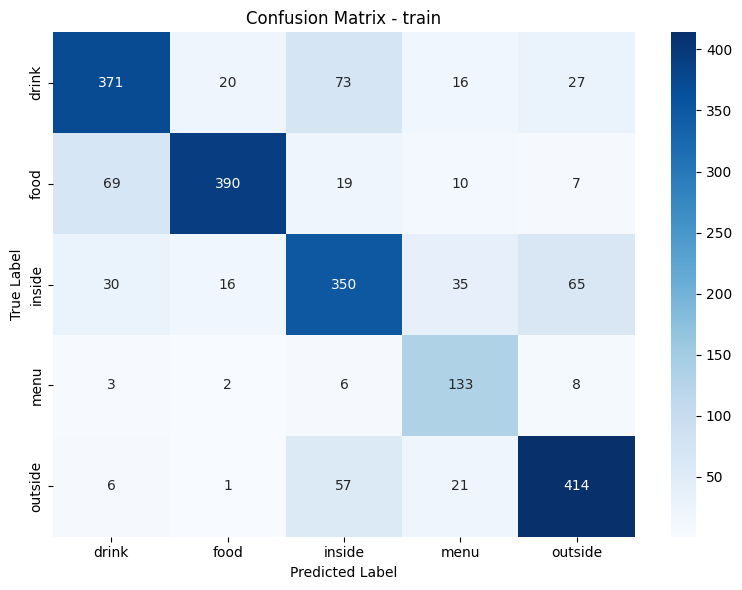


 AUC Score (macro average): 0.9483
   • AUC for class 'drink': 0.9232
   • AUC for class 'food': 0.9740
   • AUC for class 'inside': 0.9163
   • AUC for class 'menu': 0.9699
   • AUC for class 'outside': 0.9581


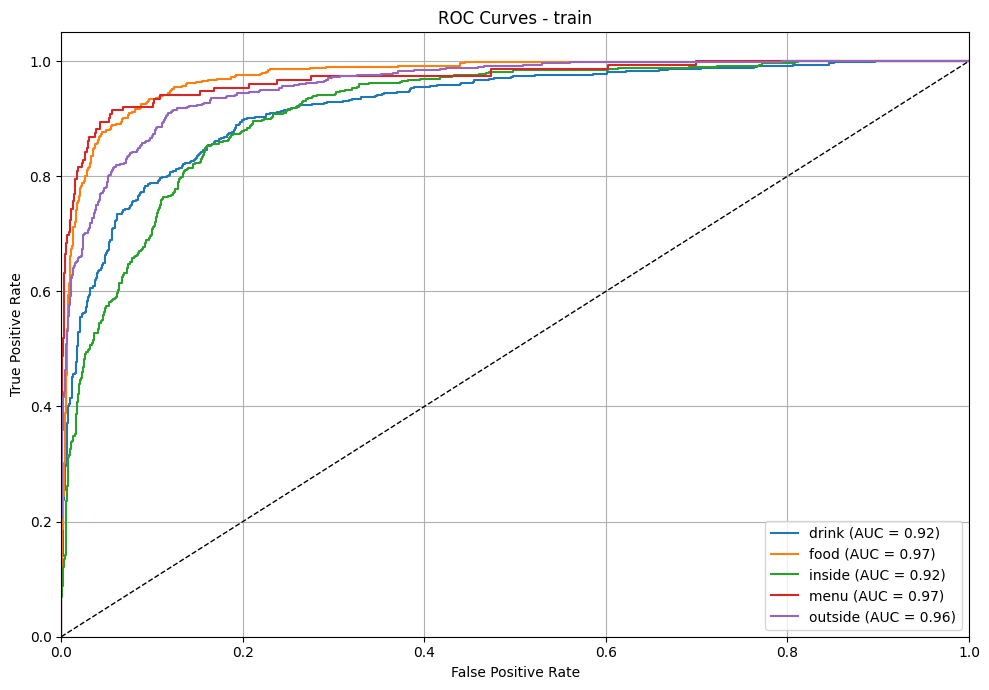

In [47]:
evaluate_model(model_tuned3, test_generator, "train")


 Evaluating on val set
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

val Accuracy: 76.28%

Classification Report:
              precision    recall  f1-score   support

       drink       0.79      0.73      0.76       522
        food       0.90      0.78      0.84       486
      inside       0.70      0.77      0.73       481
        menu       0.58      0.81      0.68       157
     outside       0.77      0.77      0.77       500

    accuracy                           0.76      2146
   macro avg       0.75      0.77      0.75      2146
weighted avg       0.77      0.76      0.77      2146



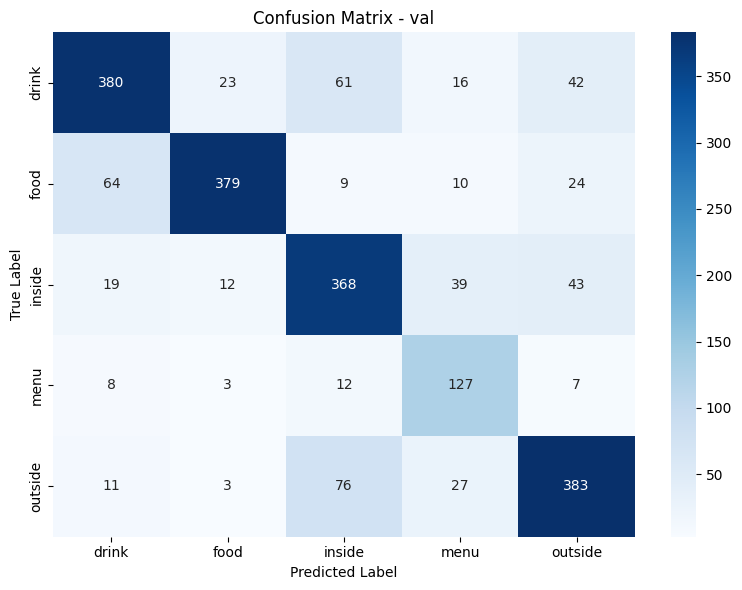


 AUC Score (macro average): 0.9448
   • AUC for class 'drink': 0.9210
   • AUC for class 'food': 0.9669
   • AUC for class 'inside': 0.9309
   • AUC for class 'menu': 0.9619
   • AUC for class 'outside': 0.9434


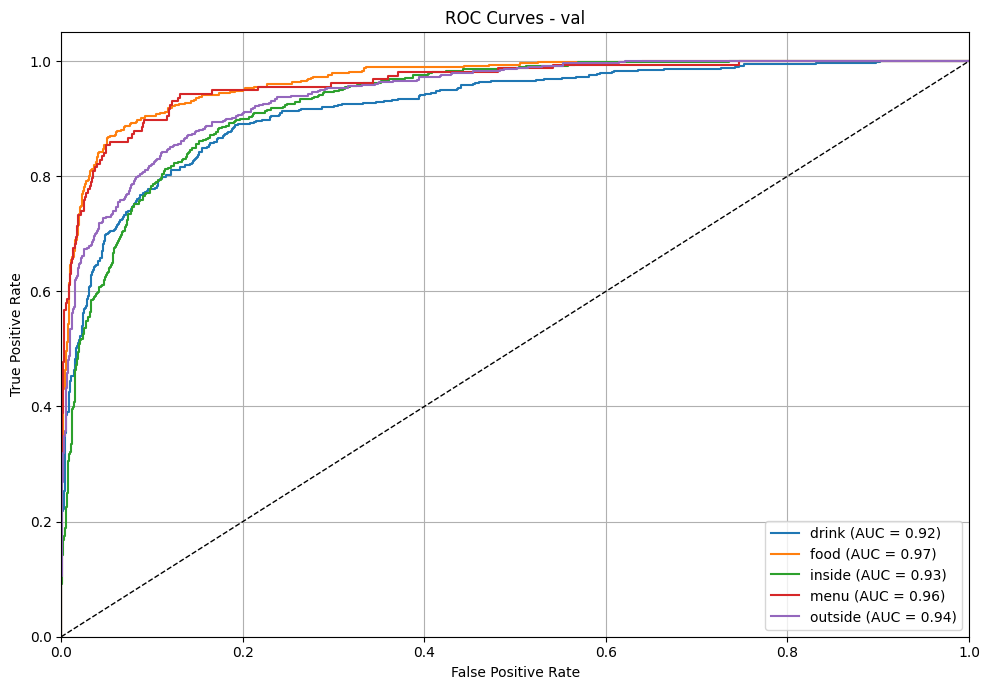

In [48]:
evaluate_model(model_tuned3, val_eval_gen, "val")


 Evaluating on test set
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

test Accuracy: 77.15%

Classification Report:
              precision    recall  f1-score   support

       drink       0.77      0.73      0.75       507
        food       0.91      0.79      0.84       495
      inside       0.69      0.71      0.70       496
        menu       0.62      0.88      0.72       152
     outside       0.79      0.83      0.81       499

    accuracy                           0.77      2149
   macro avg       0.76      0.79      0.77      2149
weighted avg       0.78      0.77      0.77      2149



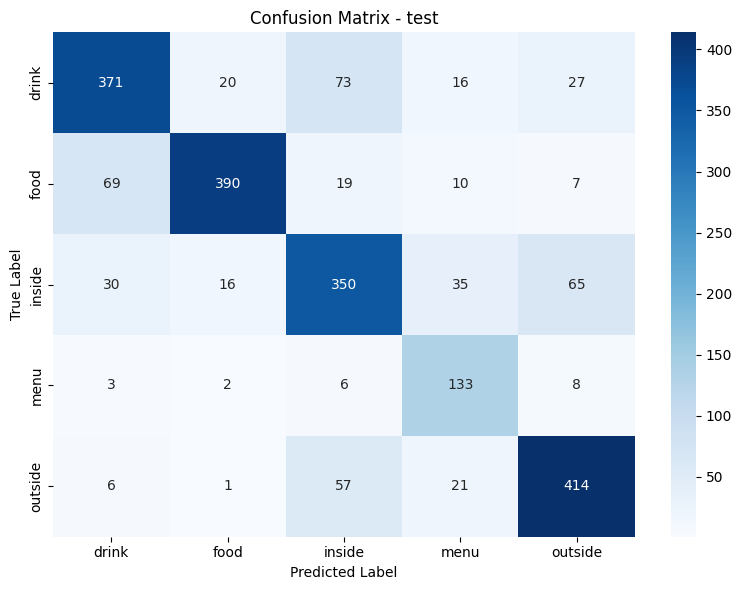


 AUC Score (macro average): 0.9483
   • AUC for class 'drink': 0.9232
   • AUC for class 'food': 0.9740
   • AUC for class 'inside': 0.9163
   • AUC for class 'menu': 0.9699
   • AUC for class 'outside': 0.9581


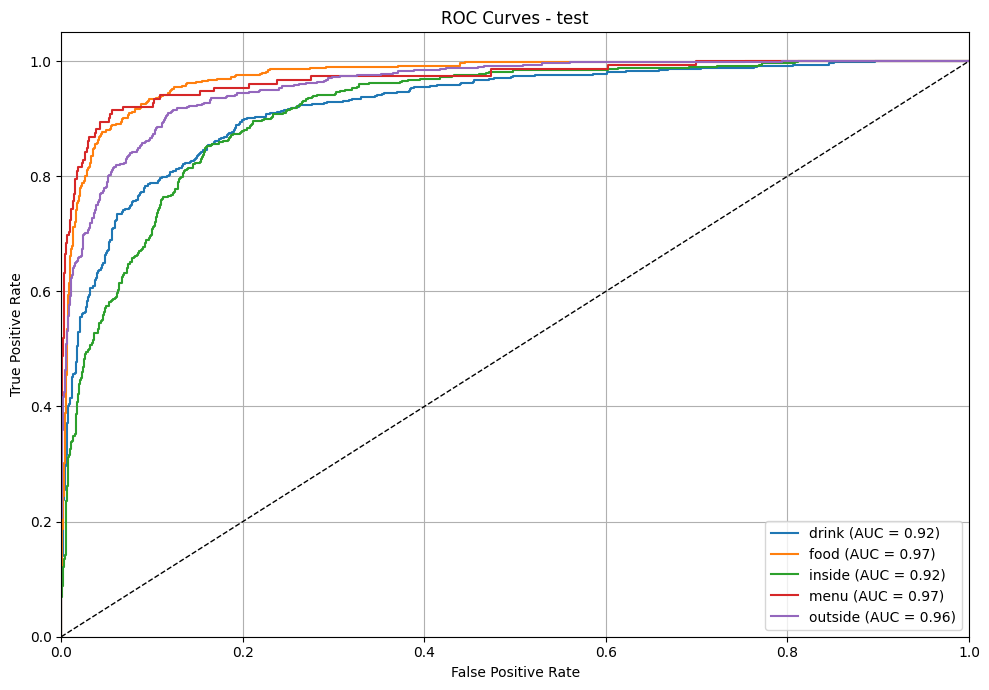

In [49]:
evaluate_model(model_tuned3, test_generator, "test")

# Lime

In [50]:
!pip install lime
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=56487ab7249b5e7b6978b5a0fc49cbd737bfae9ebeba7ac0e5a2213f247f0b06
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [51]:
import lime
from lime import lime_image
import numpy as np
from skimage.segmentation import mark_boundaries
import tensorflow as tf
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print(" All libraries imported!")
print(f" TensorFlow version: {tf.__version__}")
print(f" LIME imported successfully!")

# Quick test to make sure LIME is working
try:
    test_explainer = lime_image.LimeImageExplainer()
    print(" LIME image explainer test passed!")
except Exception as e:
    print(f" LIME test failed: {e}")

 All libraries imported!
 TensorFlow version: 2.18.0
 LIME imported successfully!
 LIME image explainer test passed!


In [ ]:
# sample images for LIME analysis
def get_sample_images_for_lime(data_generator, num_samples=3):
    """
    sample images from validation set for LIME analysis
    """
    data_generator.reset()

    # one batch of images
    batch_images, batch_labels = next(data_generator)

    # first few images
    sample_images = batch_images[:num_samples]
    sample_labels = batch_labels[:num_samples]

    # class names from generator
    class_names = list(data_generator.class_indices.keys())

    # Display sample info
    print(f" Selected {len(sample_images)} sample images")
    print(f" Available classes: {class_names}")

    for i in range(len(sample_images)):
        true_class_idx = np.argmax(sample_labels[i])
        print(f"   Image {i+1}: True class = {class_names[true_class_idx]}")

    return sample_images, sample_labels, class_names

# sample images from  validation set
sample_images, sample_labels, class_names = get_sample_images_for_lime(val_gen, num_samples=5)

print(" Sample images prepared for LIME analysis!")

 Selected 5 sample images
 Available classes: ['drink', 'food', 'inside', 'menu', 'outside']
   Image 1: True class = food
   Image 2: True class = menu
   Image 3: True class = outside
   Image 4: True class = menu
   Image 5: True class = drink
 Sample images prepared for LIME analysis!


In [ ]:
# Setup LIME explainer for CNN
def create_lime_explainer_for_cnn(model):
    """
    Create LIME image explainer for your CNN model
    """

    # prediction function that LIME can use
    def predict_function(images):
        """
        Prediction function that LIME will call
        """
        
        if len(images.shape) == 3:  # Single image
            images = np.expand_dims(images, axis=0)

        # model predictions
        predictions = model.predict(images, verbose=0)
        return predictions

    # LIME image explainer
    explainer = lime_image.LimeImageExplainer()

    print(" LIME explainer created successfully!")
    print(" Ready to explain CNN predictions!")

    return explainer, predict_function

# explainer for model
explainer, predict_fn = create_lime_explainer_for_cnn(model_tuned2)

print(" LIME explainer ready for  CNN model!")

 LIME explainer created successfully!
 Ready to explain CNN predictions!
 LIME explainer ready for  CNN model!


In [ ]:
# explanations for sample images
def explain_cnn_prediction(image, model, explainer, predict_fn, class_names, image_index):
    """
    Generate LIME explanation for a single image prediction
    """
    print(f"\n{'='*50}")
    print(f" ANALYZING IMAGE {image_index + 1}")
    print(f"{'='*50}")

    # model's prediction
    prediction_probs = model.predict(np.expand_dims(image, axis=0), verbose=0)[0]
    predicted_class_idx = np.argmax(prediction_probs)
    confidence = prediction_probs[predicted_class_idx]

    print(f" Model Prediction: {class_names[predicted_class_idx]}")
    print(f" Confidence: {confidence:.3f}")
    print(f" All class probabilities:")
    for i, prob in enumerate(prediction_probs):
        print(f"   {class_names[i]}: {prob:.3f}")

    print(f"\n Generating LIME explanation...")

    # LIME explanation
    explanation = explainer.explain_instance(
        image,
        predict_fn,
        top_labels=len(class_names),  
        hide_color=0,                 
        num_samples=1000             
    )

    print(f" LIME explanation generated!")

    return explanation, predicted_class_idx, confidence, prediction_probs

# explanations for all sample images
all_explanations = []
all_predictions = []
all_confidences = []
all_probs = []

for i, image in enumerate(sample_images):
    explanation, pred_class, confidence, probs = explain_cnn_prediction(
        image, model_tuned3, explainer, predict_fn, class_names, i
    )

    all_explanations.append(explanation)
    all_predictions.append(pred_class)
    all_confidences.append(confidence)
    all_probs.append(probs)

print(f"\n Generated LIME explanations for {len(sample_images)} images!")


 ANALYZING IMAGE 1
 Model Prediction: food
 Confidence: 0.996
 All class probabilities:
   drink: 0.004
   food: 0.996
   inside: 0.000
   menu: 0.000
   outside: 0.000

 Generating LIME explanation...


  0%|          | 0/1000 [00:00<?, ?it/s]

 LIME explanation generated!

 ANALYZING IMAGE 2
 Model Prediction: menu
 Confidence: 0.432
 All class probabilities:
   drink: 0.255
   food: 0.007
   inside: 0.219
   menu: 0.432
   outside: 0.087

 Generating LIME explanation...


  0%|          | 0/1000 [00:00<?, ?it/s]

 LIME explanation generated!

 ANALYZING IMAGE 3
 Model Prediction: outside
 Confidence: 1.000
 All class probabilities:
   drink: 0.000
   food: 0.000
   inside: 0.000
   menu: 0.000
   outside: 1.000

 Generating LIME explanation...


  0%|          | 0/1000 [00:00<?, ?it/s]

 LIME explanation generated!

 ANALYZING IMAGE 4
 Model Prediction: menu
 Confidence: 0.907
 All class probabilities:
   drink: 0.011
   food: 0.006
   inside: 0.041
   menu: 0.907
   outside: 0.035

 Generating LIME explanation...


  0%|          | 0/1000 [00:00<?, ?it/s]

 LIME explanation generated!

 ANALYZING IMAGE 5
 Model Prediction: drink
 Confidence: 0.629
 All class probabilities:
   drink: 0.629
   food: 0.076
   inside: 0.277
   menu: 0.008
   outside: 0.010

 Generating LIME explanation...


  0%|          | 0/1000 [00:00<?, ?it/s]

 LIME explanation generated!

 Generated LIME explanations for 5 images!


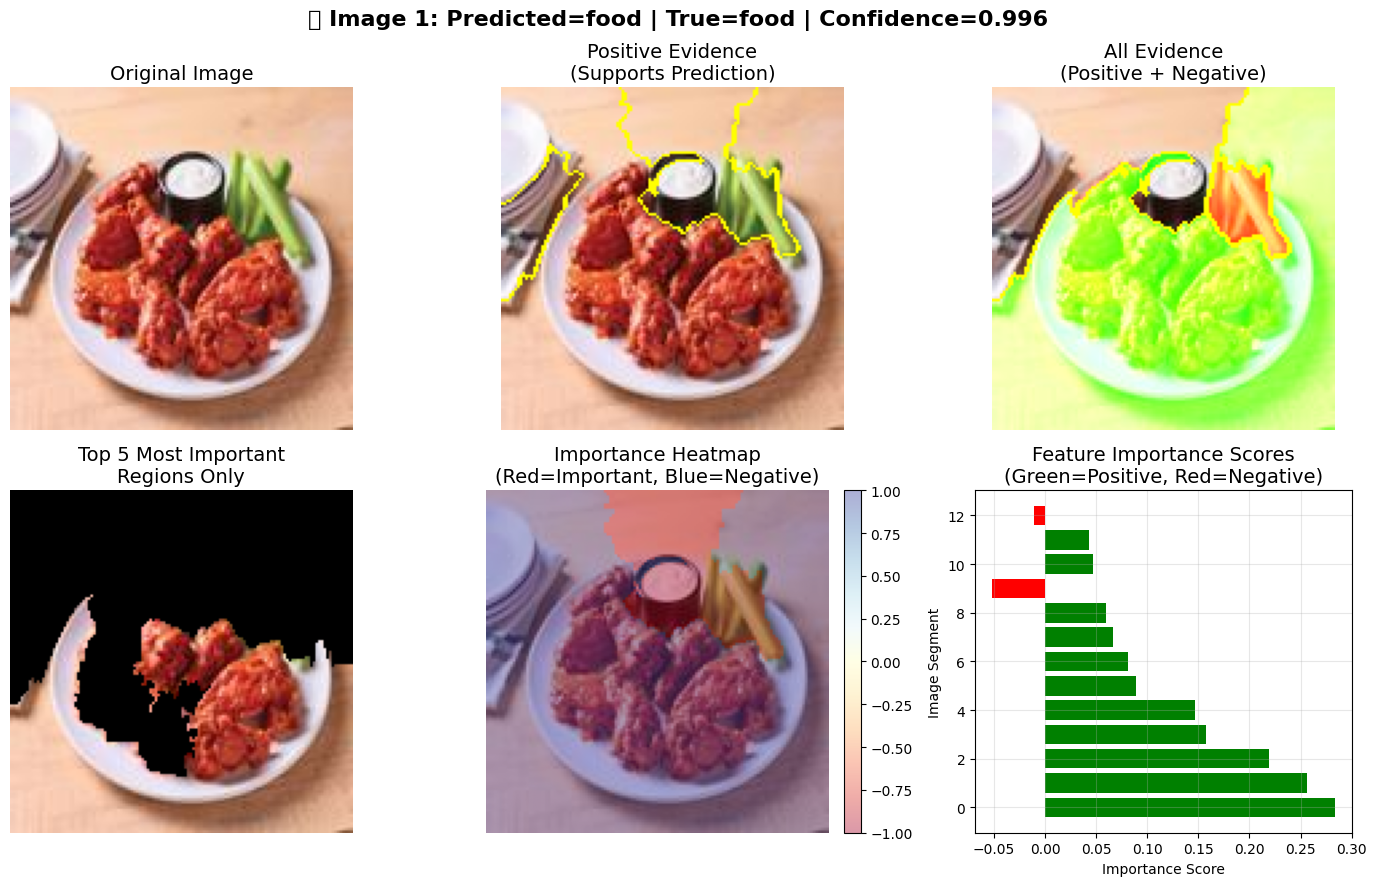

📊 Explanation Summary for Image 1:
   ✅ Positive features: 11
   ❌ Negative features: 2
   🔥 Strongest positive: 0.284
   🧊 Strongest negative: -0.052
   ⚖️ Total features analyzed: 13


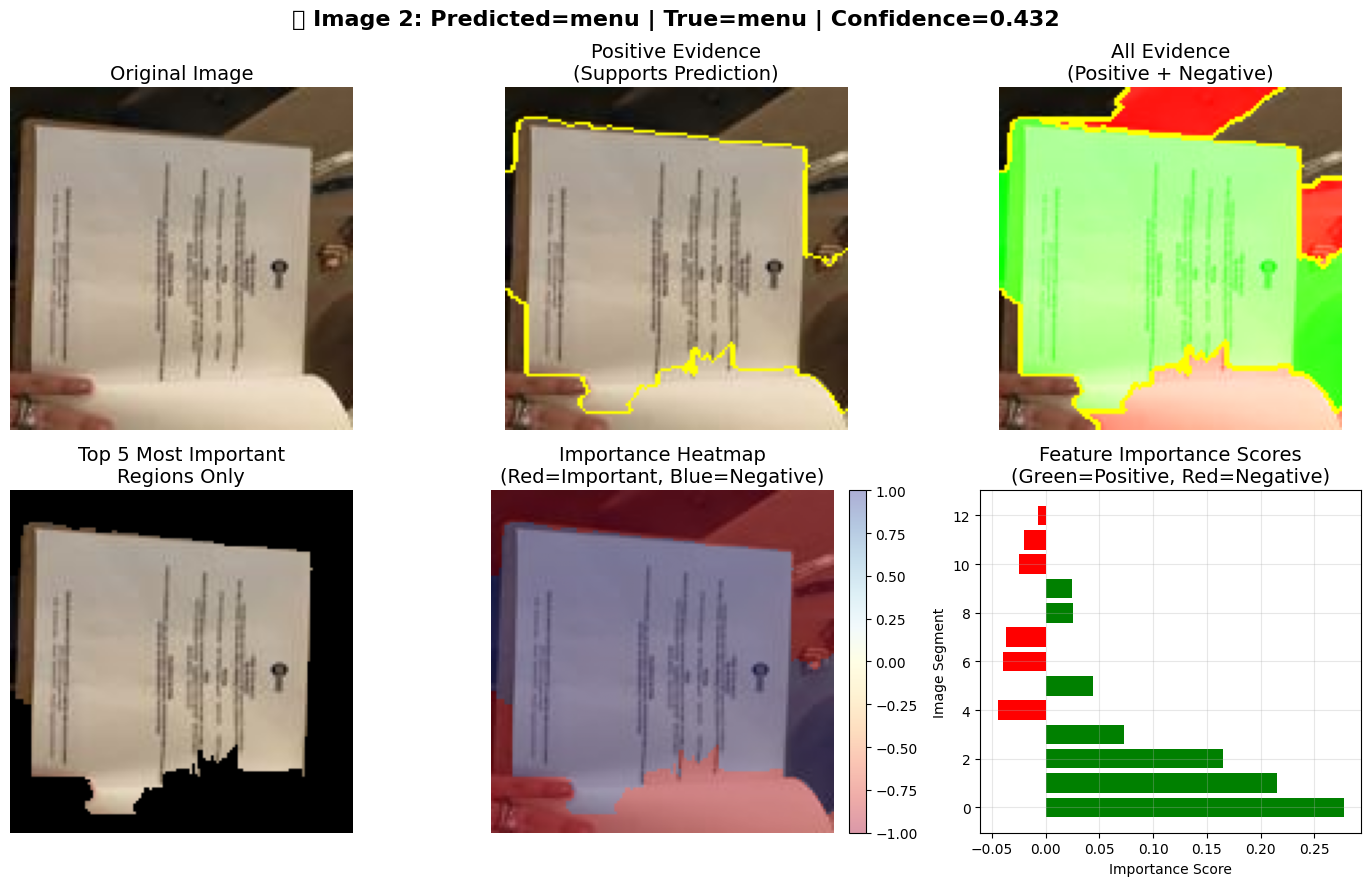

📊 Explanation Summary for Image 2:
   ✅ Positive features: 7
   ❌ Negative features: 6
   🔥 Strongest positive: 0.277
   🧊 Strongest negative: -0.045
   ⚖️ Total features analyzed: 13


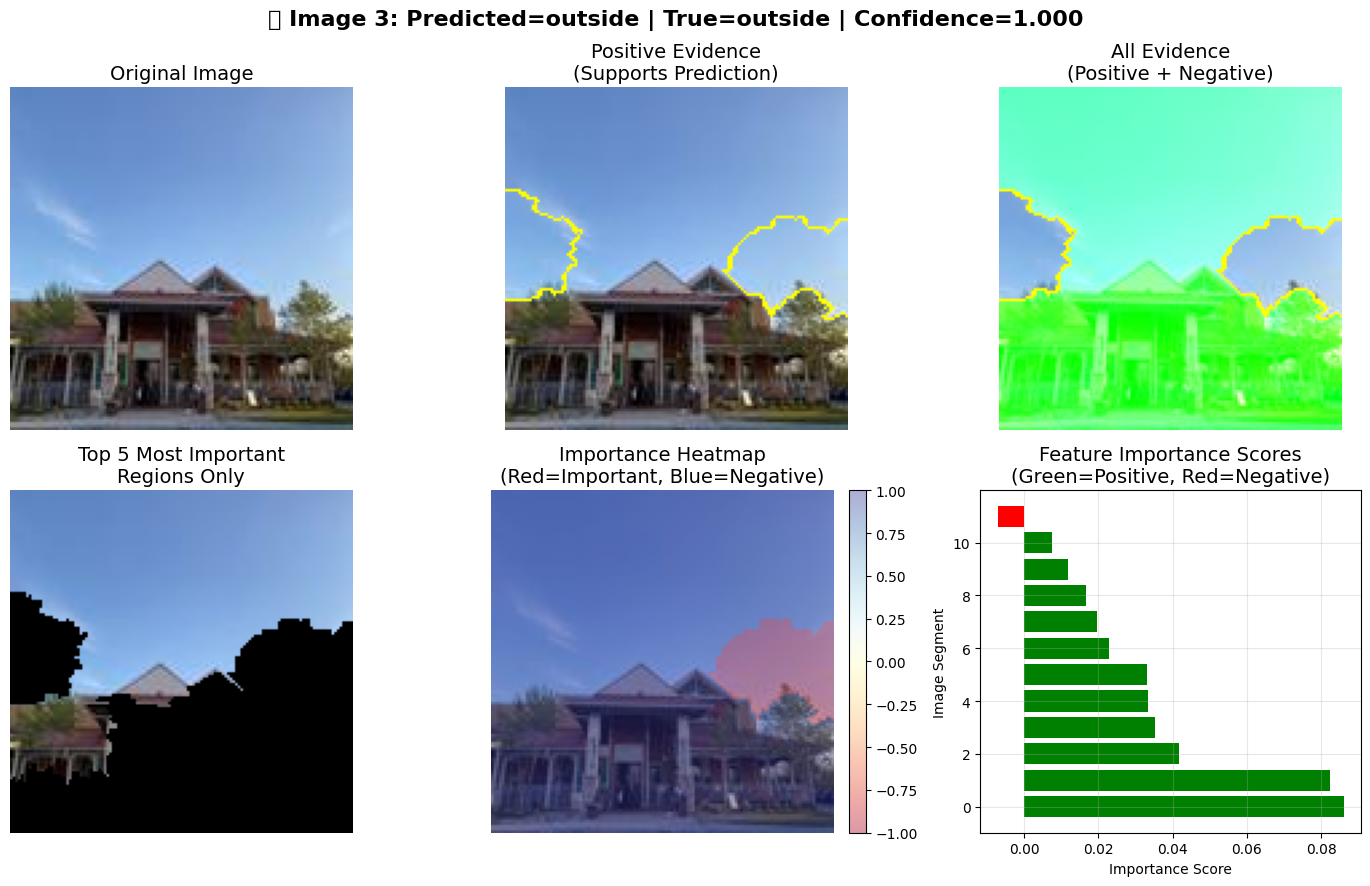

📊 Explanation Summary for Image 3:
   ✅ Positive features: 11
   ❌ Negative features: 1
   🔥 Strongest positive: 0.086
   🧊 Strongest negative: -0.007
   ⚖️ Total features analyzed: 12


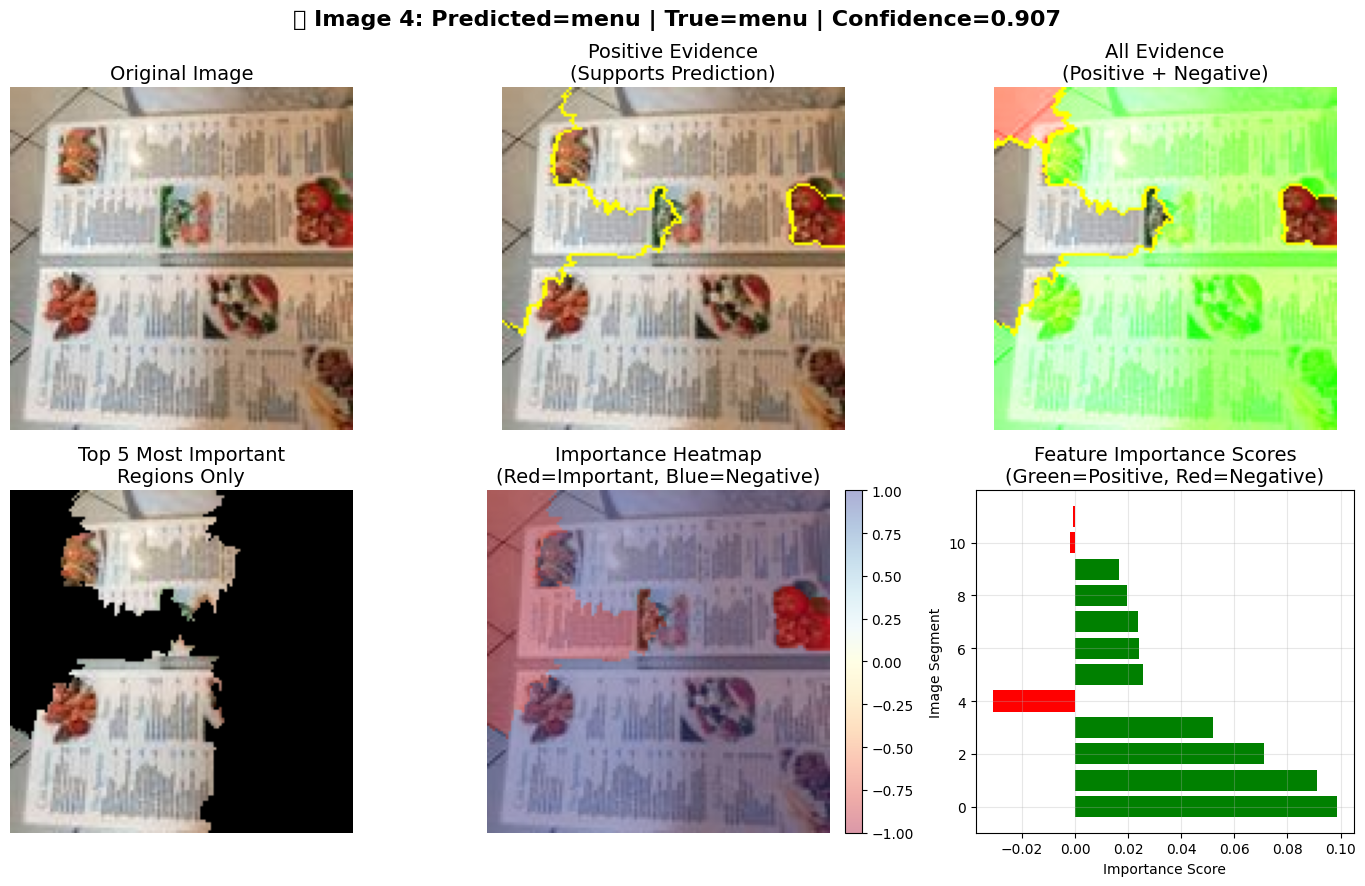

📊 Explanation Summary for Image 4:
   ✅ Positive features: 9
   ❌ Negative features: 3
   🔥 Strongest positive: 0.099
   🧊 Strongest negative: -0.031
   ⚖️ Total features analyzed: 12


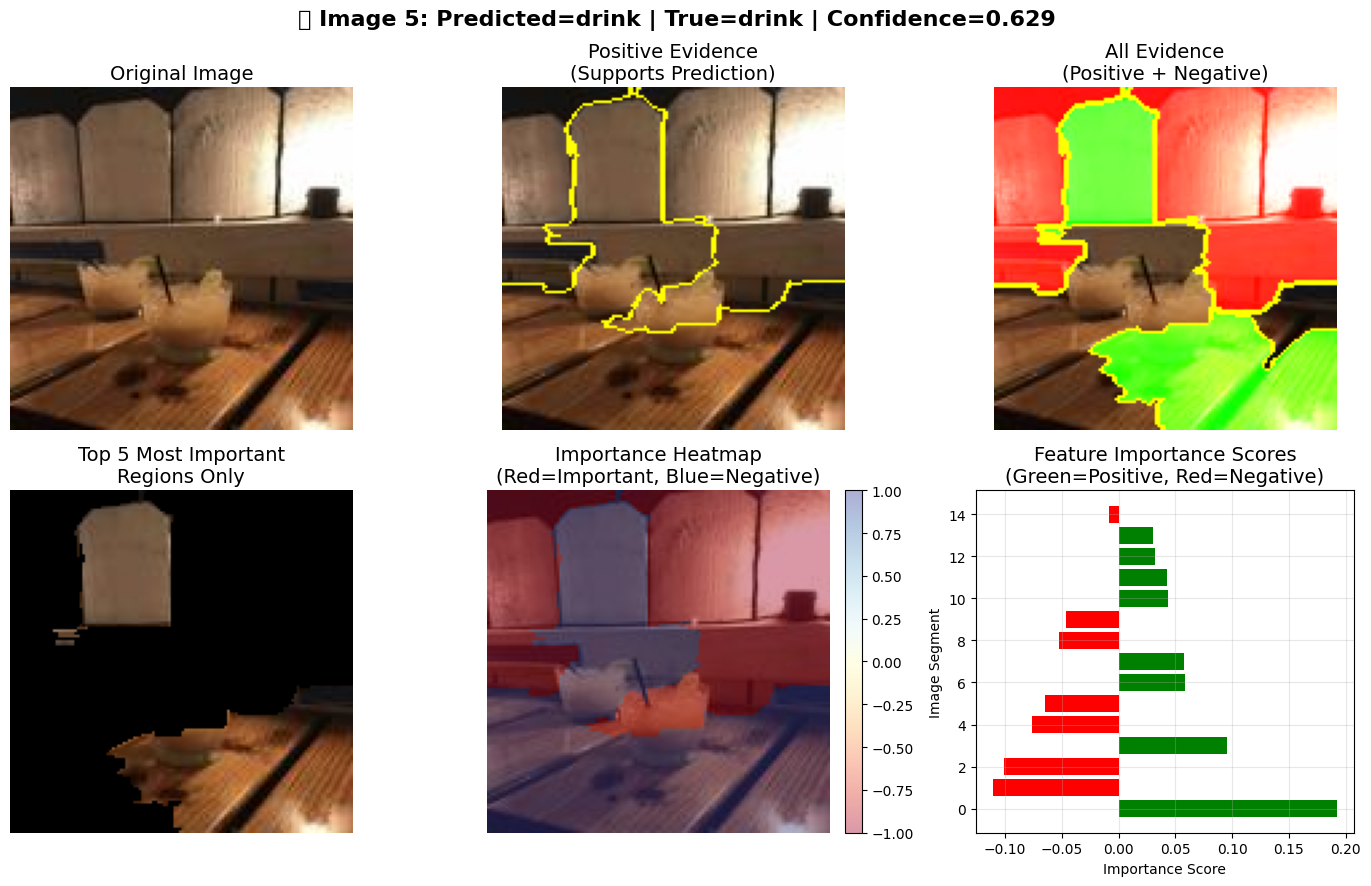

📊 Explanation Summary for Image 5:
   ✅ Positive features: 8
   ❌ Negative features: 7
   🔥 Strongest positive: 0.192
   🧊 Strongest negative: -0.110
   ⚖️ Total features analyzed: 15
✅ All LIME visualizations complete!


In [ ]:
# Visualizations
def visualize_lime_explanation(image, explanation, predicted_class, confidence,
                             class_names, true_label, image_idx):

    # Get true class name
    true_class_name = class_names[np.argmax(true_label)]
    pred_class_name = class_names[predicted_class]

    # subplot layout
    fig, axes = plt.subplots(2, 3, figsize=(14, 9))

    # Main title
    correct = "✅" if predicted_class == np.argmax(true_label) else "❌"
    fig.suptitle(f'{correct} Image {image_idx+1}: Predicted={pred_class_name} | True={true_class_name} | Confidence={confidence:.3f}',
                 fontsize=16, fontweight='bold')

    # Original Image
    axes[0,0].imshow(image)
    axes[0,0].set_title('Original Image', fontsize=14)
    axes[0,0].axis('off')

    # Positive features
    temp_pos, mask_pos = explanation.get_image_and_mask(
        predicted_class,
        positive_only=True,
        num_features=10,
        hide_rest=False
    )
    axes[0,1].imshow(mark_boundaries(temp_pos, mask_pos))
    axes[0,1].set_title('Positive Evidence\n(Supports Prediction)', fontsize=14)
    axes[0,1].axis('off')

    # Negative features
    temp_neg, mask_neg = explanation.get_image_and_mask(
        predicted_class,
        positive_only=False,
        num_features=10,
        hide_rest=False
    )
    axes[0,2].imshow(mark_boundaries(temp_neg, mask_neg))
    axes[0,2].set_title('All Evidence\n(Positive + Negative)', fontsize=14)
    axes[0,2].axis('off')

    # Top important regions only
    temp_top, mask_top = explanation.get_image_and_mask(
        predicted_class,
        positive_only=True,
        num_features=5,
        hide_rest=True  # Hide everything else
    )
    axes[1,0].imshow(temp_top)
    axes[1,0].set_title('Top 5 Most Important\nRegions Only', fontsize=14)
    axes[1,0].axis('off')

    # Importance heatmap overlay
    temp_heat, mask_heat = explanation.get_image_and_mask(
        predicted_class,
        positive_only=False,
        num_features=20,
        hide_rest=False
    )
    axes[1,1].imshow(image)
    im = axes[1,1].imshow(mask_heat, alpha=0.4, cmap='RdYlBu')
    axes[1,1].set_title('Importance Heatmap\n(Red=Important, Blue=Negative)', fontsize=14)
    axes[1,1].axis('off')

    # Feature importance scores
    feature_importance = explanation.local_exp[predicted_class]
    features, scores = zip(*feature_importance[:15])  # Top 15 features

    colors = ['green' if score > 0 else 'red' for score in scores]
    bars = axes[1,2].barh(range(len(scores)), scores, color=colors)
    axes[1,2].set_title('Feature Importance Scores\n(Green=Positive, Red=Negative)', fontsize=14)
    axes[1,2].set_xlabel('Importance Score')
    axes[1,2].set_ylabel('Image Segment')
    axes[1,2].grid(True, alpha=0.3)

    # Add colorbar for heatmap
    plt.colorbar(im, ax=axes[1,1], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    positive_features = [score for score in scores if score > 0]
    negative_features = [score for score in scores if score < 0]

    print(f" Explanation Summary for Image {image_idx+1}:")
    print(f"  Positive features: {len(positive_features)}")
    print(f"  Negative features: {len(negative_features)}")
    print(f"  Strongest positive: {max(scores):.3f}")
    if negative_features:
        print(f"  Strongest negative: {min(scores):.3f}")
    print(f"   Total features analyzed: {len(feature_importance)}")

# Visualize all explanations
for i in range(len(sample_images)):
    visualize_lime_explanation(
        sample_images[i],
        all_explanations[i],
        all_predictions[i],
        all_confidences[i],
        class_names,
        sample_labels[i],
        i
    )

print("All LIME visualizations complete!")